# Displays the Frequent Colors Found
### Uses:
- Display the colors found in legend and cells

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory you want to use
specific_dir = 'C:\\Users\\roche\\Documents\\GitHub\\encoder-tool'

# Replace with your image path relative to the specific directory
image_path = os.path.join(specific_dir, 'generated-heatmaps', 'Absence_of_corruption_Index__IDEA_.png')
image = Image.open(image_path)
image = image.convert('RGB')  # Ensure image is in RGB format
image_array = np.array(image)

# Reshape the array to a 2D array where each row is a color
pixels = image_array.reshape(-1, image_array.shape[-1])

# Find unique colors and their counts
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Sort the unique colors by their counts in descending order
sorted_indices = np.argsort(-counts)
top_colors = unique_colors[sorted_indices][:6]
top_counts = counts[sorted_indices][:6]

# Display the top 6 most frequent colors and their counts
print("Top 6 most frequent colors and their counts:")
for color, count in zip(top_colors, top_counts):
    print(f"Color: {color}, Count: {count}")

# Optionally, display the top 6 most frequent colors
plt.figure(figsize=(10, 2))
plt.imshow([top_colors], aspect='auto')
plt.axis('off')
plt.show()

## Contour Detection for Grid heatmap cells region

In [ ]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")
            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box in green

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

## Removing the Detected Regions

### Uses:
- Removes the graphical content such as the grid cells and color legend to cleanly extract the text in the grid heatmap cells

In [9]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\encoder-tool\\generated-heatmaps'
output_dir = 'D:\\encoder-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 405, y: 105, width: 568, height: 795
Removing specific size contour at x: 1113, y: 374, width: 27, height: 154
Removing specific size contour at x: 405, y: 105, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, height: 795
Removing specific size contour at x: 1113, y: 374, width: 27, height: 154
Removing specific size contour at x: 405, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 504, y: 131, width: 568, height: 795
Removing specific size contour at x: 1213, y: 374, width: 27, height: 154
Removing specific size contour at x: 504, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, height: 795
Removing specific size contour at x: 1113, y: 374, width: 27, height: 154
Removing specific size contour at x: 405, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, 

## Extracting Y-Axis Label from the Removed Contour Images
#### Uses:
- Extracts the texts from the region of interest
- `Note: The varying position of images sometimes include the labels in x-axis, see the instances below`

#### Next step:
- Remove integers extracted from the region of interest to include only the countries or the strings

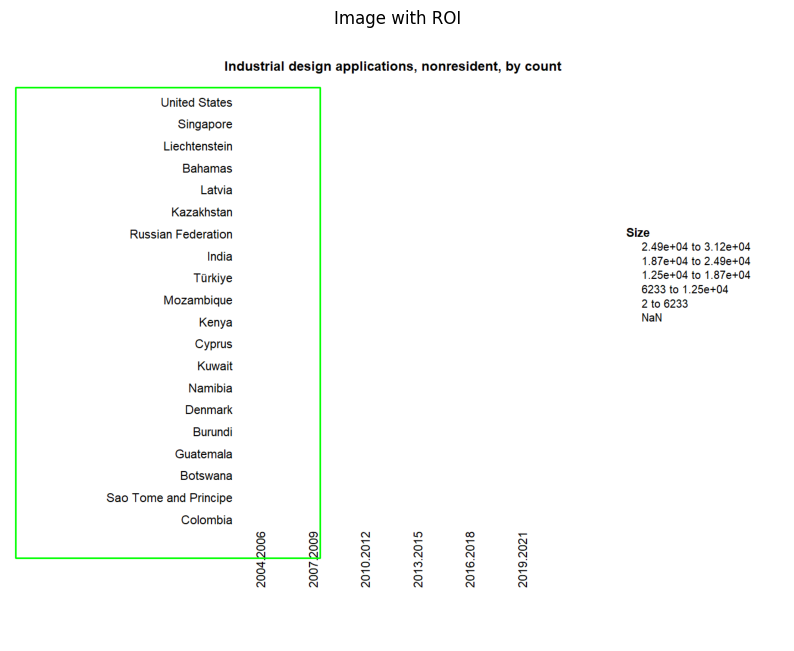

Extracted Text from ROI:
United States
Singapore
Liechtenstein
Bahamas

Latvia

Kazakhstan
Russian Federation
India

Turkiye
Mozambique
Kenya

Cyprus

Kuwait

Namibia

Denmark

Burundi

Guatemala
Botswana

Sao Tome and Principe

Colombia

2006

2009




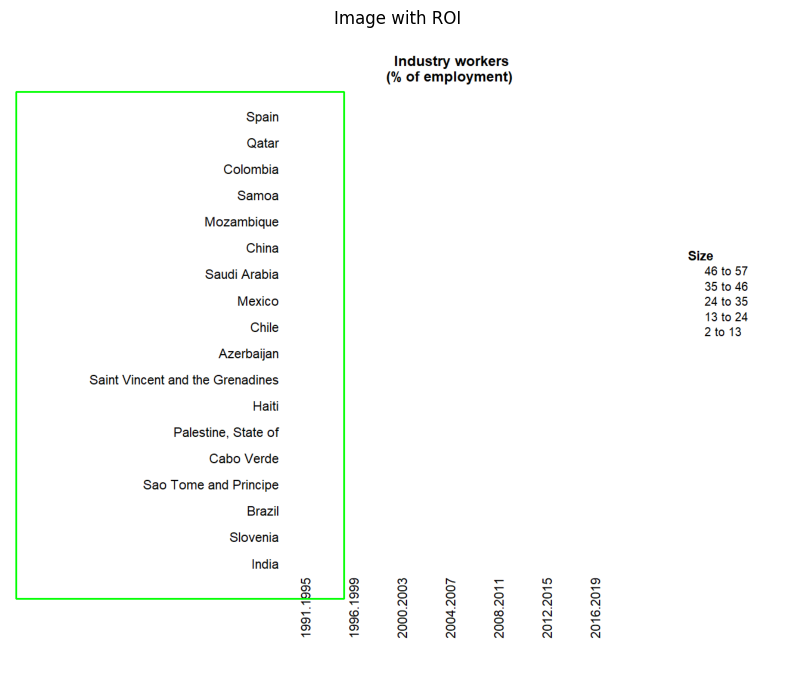

Extracted Text from ROI:
Spain

Qatar

Colombia

Samoa

Mozambique

China

Saudi Arabia

Mexico

Chile

Azerbaijan

Saint Vincent and the Grenadines
Haiti

Palestine, State of
Cabo Verde

Sao Tome and Principe
Brazil

Slovenia

India

995




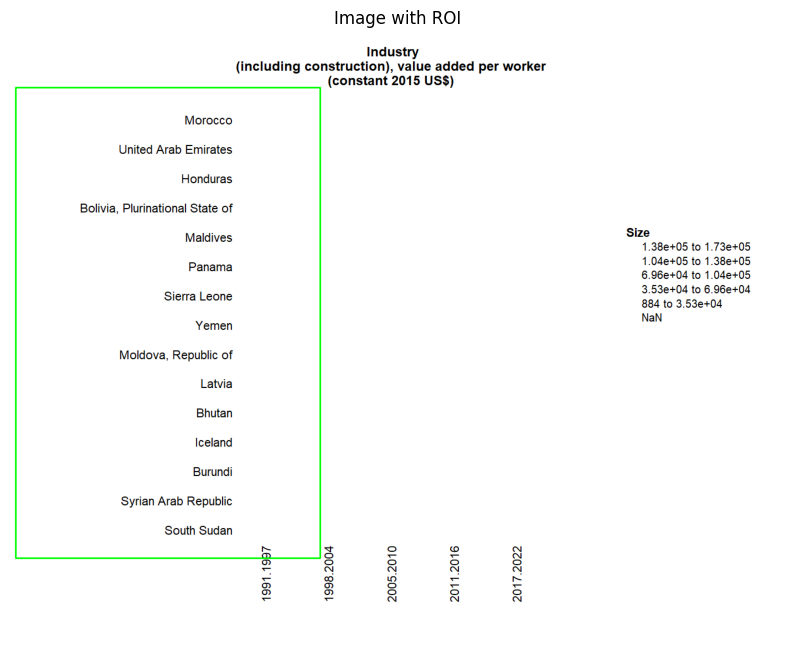

Extracted Text from ROI:
Morocco

United Arab Emirates
Honduras

Bolivia, Plurinational State of
Maldives

Panama

Sierra Leone

Yemen

Moldova, Republic of
Latvia

Bhutan

Iceland

Burundi

Syrian Arab Republic

South Sudan

97




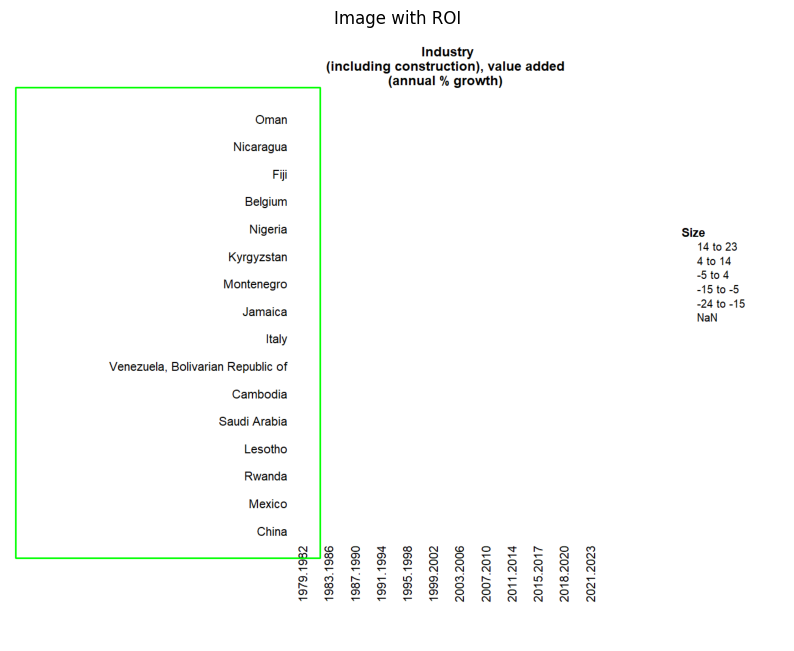

Extracted Text from ROI:
Oman
Nicaragua
Fiji

Belgium
Nigeria
Kyrgyzstan
Montenegro
Jamaica
Italy
Venezuela, Bolivarian Republic of
Cambodia
Saudi Arabia
Lesotho
Rwanda
Mexico

China

82




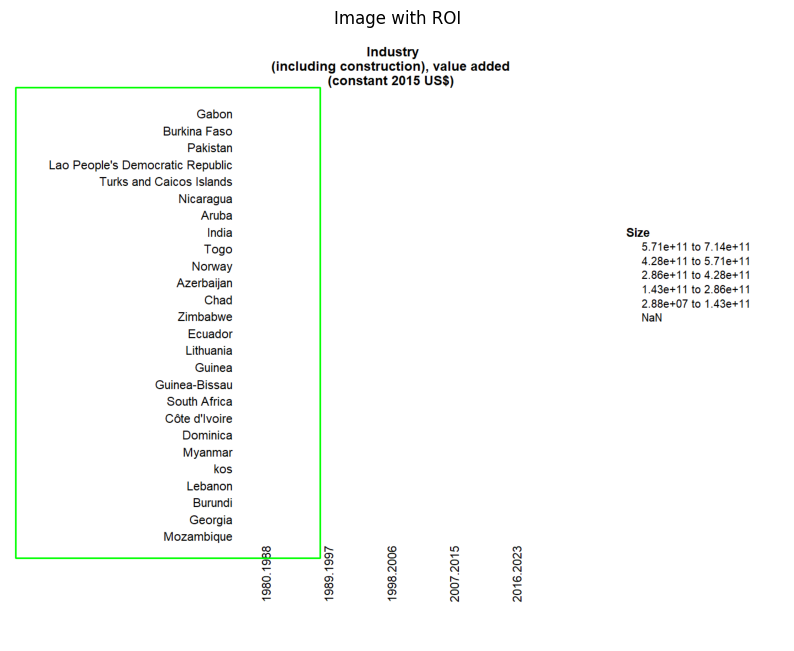

Extracted Text from ROI:
Gabon
Burkina Faso
Pakistan

Lao People's Democratic Republic
Turks and Caicos Islands
Nicaragua
Aruba

India

Togo

Norway
Azerbaijan
Chad
Zimbabwe
Ecuador
Lithuania
Guinea
Guinea-Bissau
South Africa
Céte d'Ivoire
Dominica
Myanmar

kos

Lebanon
Burundi
Georgia
Mozambique

88




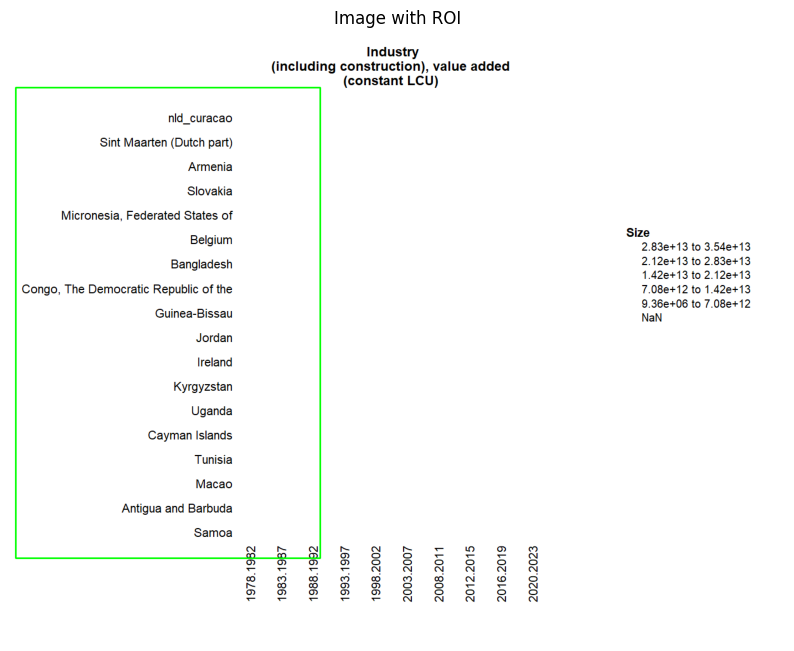

Extracted Text from ROI:
nid_curacao

Sint Maarten (Dutch part)
Armenia

Slovakia

Micronesia, Federated States of
Belgium

Bangladesh

Congo, The Democratic Republic of the
Guinea-Bissau

Jordan

Ireland

Kyrgyzstan

Uganda

Cayman Islands

Tunisia

Macao

Antigua and Barbuda

Samoa

82

87

92




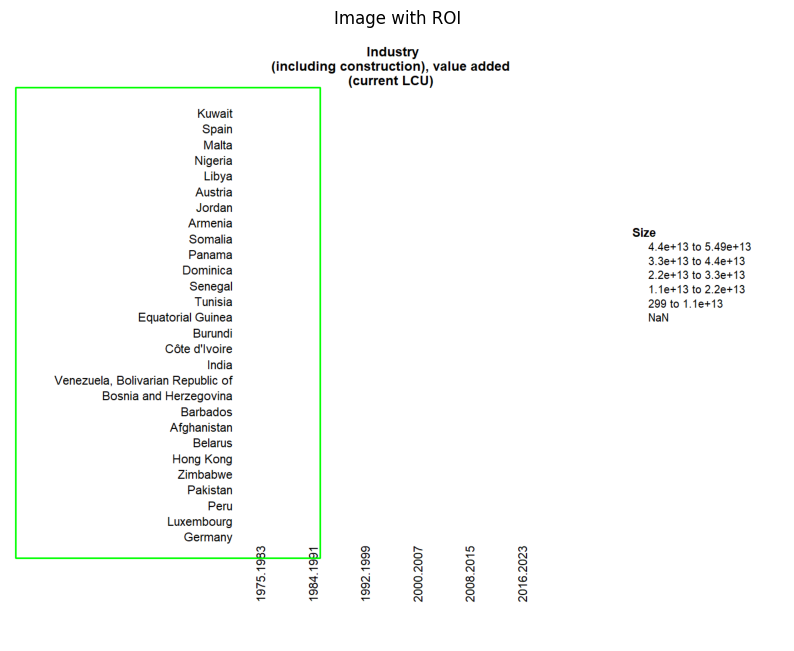

Extracted Text from ROI:
Kuwait

Spain

Malta

Nigeria

Libya

Austria

Jordan

Armenia

Somalia

Panama
Dominica
Senegal

Tunisia
Equatorial Guinea
Burundi

Céte d'Ivoire
India

Venezuela, Bolivarian Republic of
Bosnia and Herzegovina
Barbados
Afghanistan
Belarus

Hong Kong
Zimbabwe
Pakistan

Peru

Luxembourg
Germany

83,

31




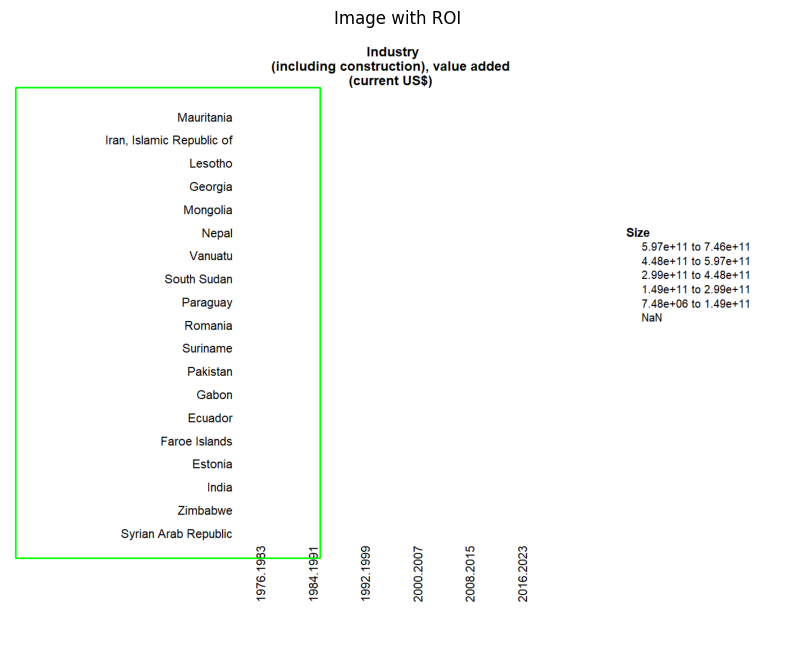

Extracted Text from ROI:
Mauritania
Iran, Islamic Republic of
Lesotho
Georgia
Mongolia
Nepal
Vanuatu
South Sudan
Paraguay
Romania
Suriname
Pakistan
Gabon
Ecuador
Faroe Islands
Estonia

India
Zimbabwe

Syrian Arab Republic

83,

31




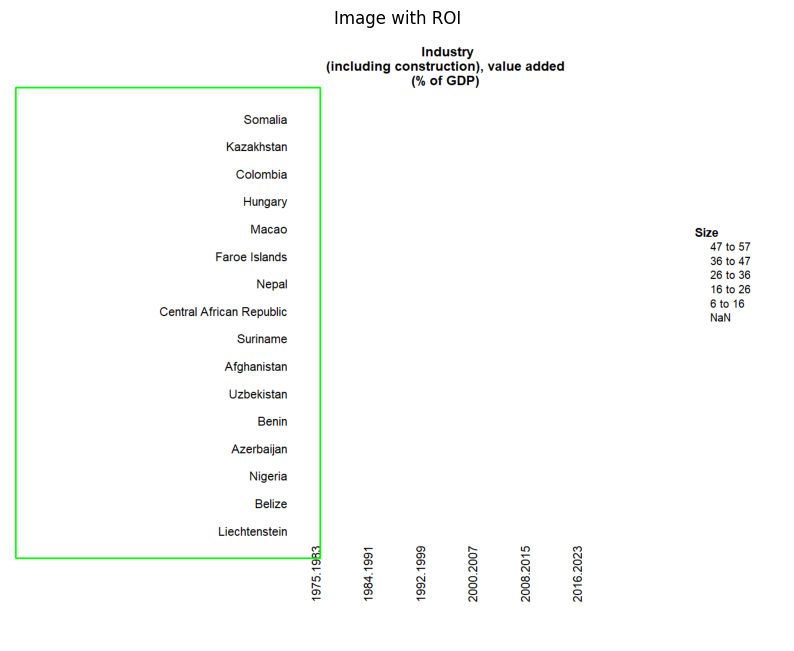

Extracted Text from ROI:
Somalia
Kazakhstan
Colombia
Hungary
Macao

Faroe Islands
Nepal

Central African Republic
Suriname
Afghanistan
Uzbekistan
Benin
Azerbaijan
Nigeria
Belize

Liechtenstein

R2




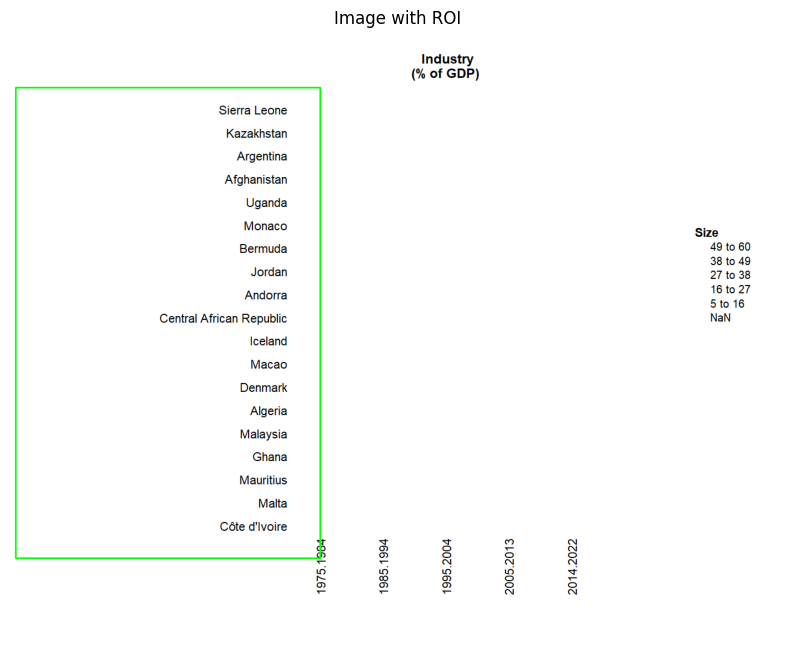

Extracted Text from ROI:
Sierra Leone
Kazakhstan
Argentina
Afghanistan
Uganda
Monaco
Bermuda
Jordan
Andorra
Central African Republic
Iceland
Macao
Denmark
Algeria
Malaysia
Ghana
Mauritius
Malta

Céte d'Ivoire




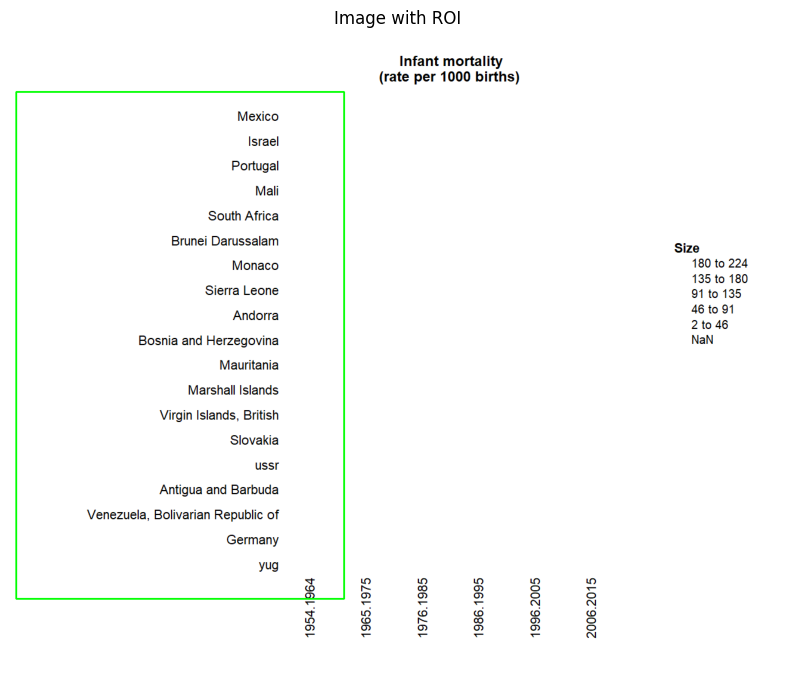

Extracted Text from ROI:
Mexico

Israel

Portugal

Mali

South Africa

Brunei Darussalam
Monaco

Sierra Leone

Andorra

Bosnia and Herzegovina
Mauritania

Marshall Islands

Virgin Islands, British
Slovakia

ussr

Antigua and Barbuda
Venezuela, Bolivarian Republic of
Germany

yug

964




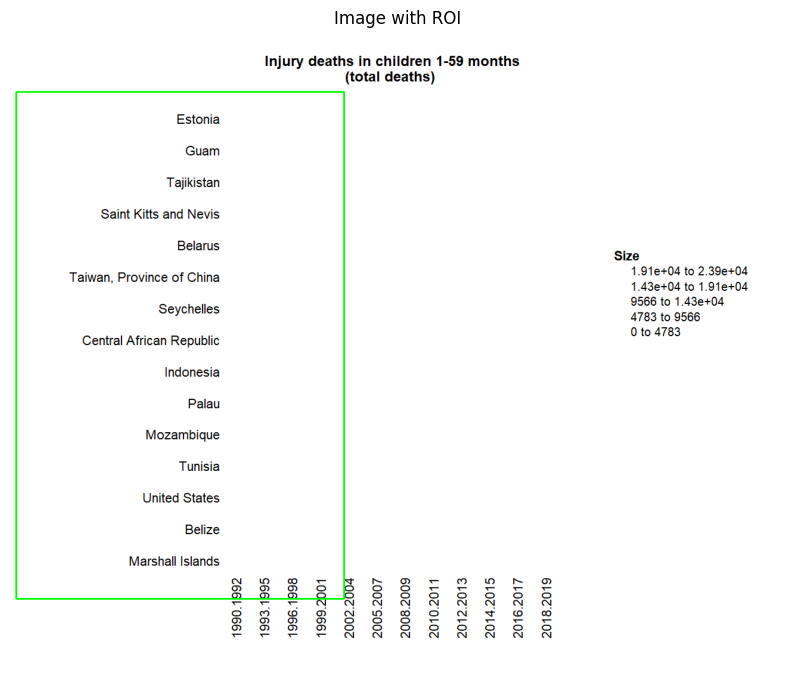

Extracted Text from ROI:
Estonia

Guam

Tajikistan

Saint Kitts and Nevis
Belarus

Taiwan, Province of China
Seychelles

Central African Republic
Indonesia

Palau

Mozambique

Tunisia

United States

Belize

Marshall Islands

92

5
8
1




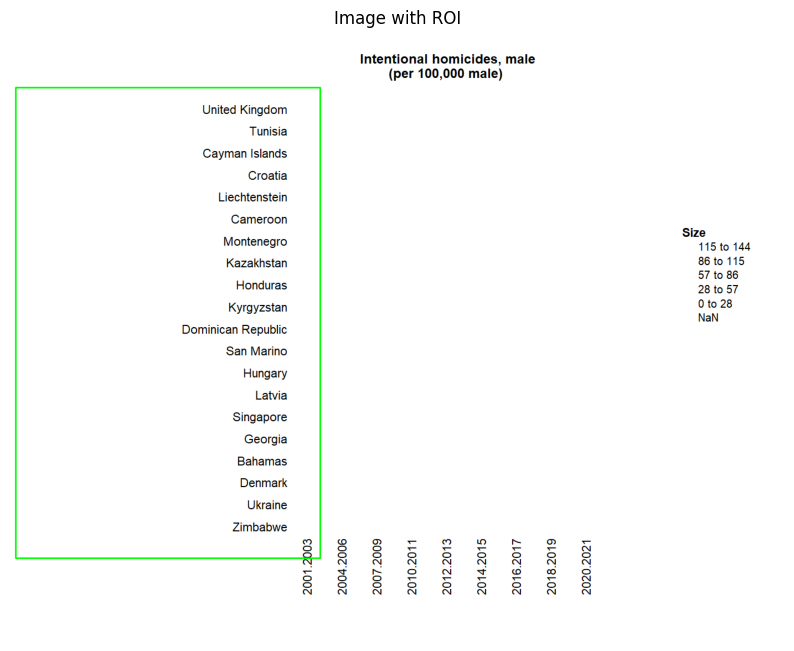

Extracted Text from ROI:
United Kingdom
Tunisia
Cayman Islands
Croatia
Liechtenstein
Cameroon
Montenegro
Kazakhstan
Honduras
Kyrgyzstan
Dominican Republic
San Marino
Hungary

Latvia
Singapore
Georgia
Bahamas
Denmark
Ukraine

Zimbabwe

003




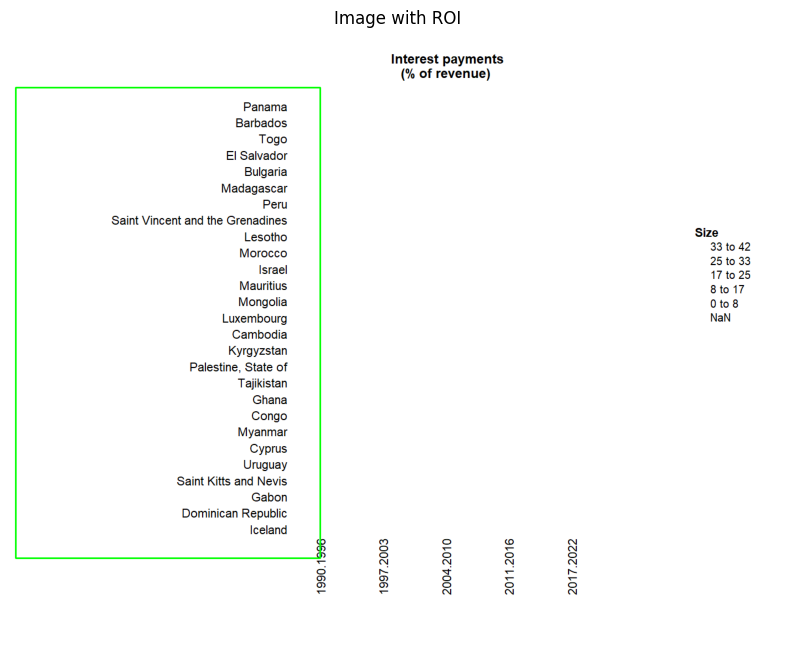

Extracted Text from ROI:
Panama

Barbados

Togo

El Salvador
Bulgaria
Madagascar

Peru

Saint Vincent and the Grenadines
Lesotho

Morocco

Israel

Mauritius

Mongolia
Luxembourg
Cambodia
Kyrgyzstan
Palestine, State of
Tajikistan

Ghana

Congo

Myanmar

Cyprus

Uruguay

Saint Kitts and Nevis
Gabon

Dominican Republic
Iceland




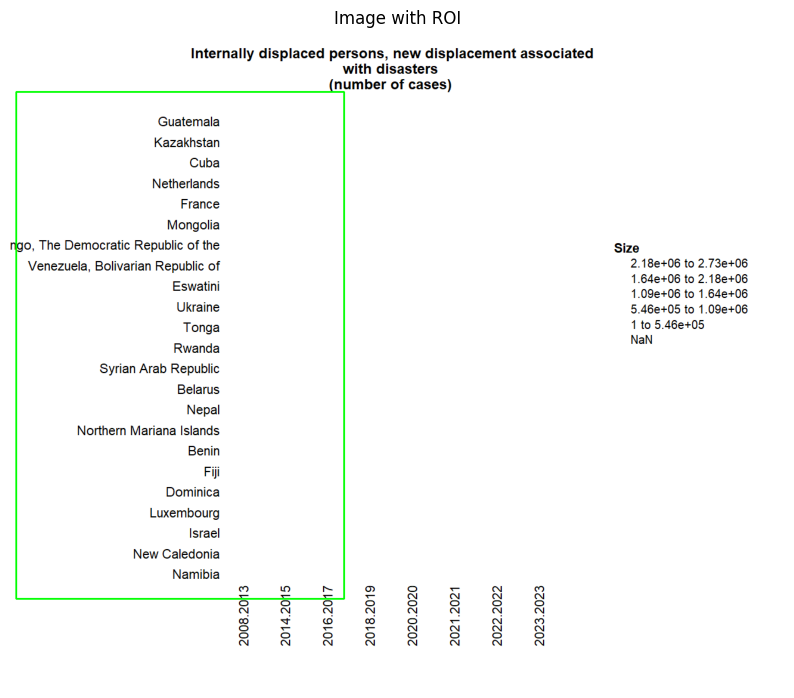

Extracted Text from ROI:
Guatemala
Kazakhstan
Cuba
Netherlands
France
Mongolia
go, The Democratic Republic of the
Venezuela, Bolivarian Republic of
Eswatini

Ukraine

Tonga

Rwanda

Syrian Arab Republic

Belarus

Nepal

Northern Mariana Islands

Benin

Fiji

Dominica

Luxembourg

Israel

New Caledonia

Namibia




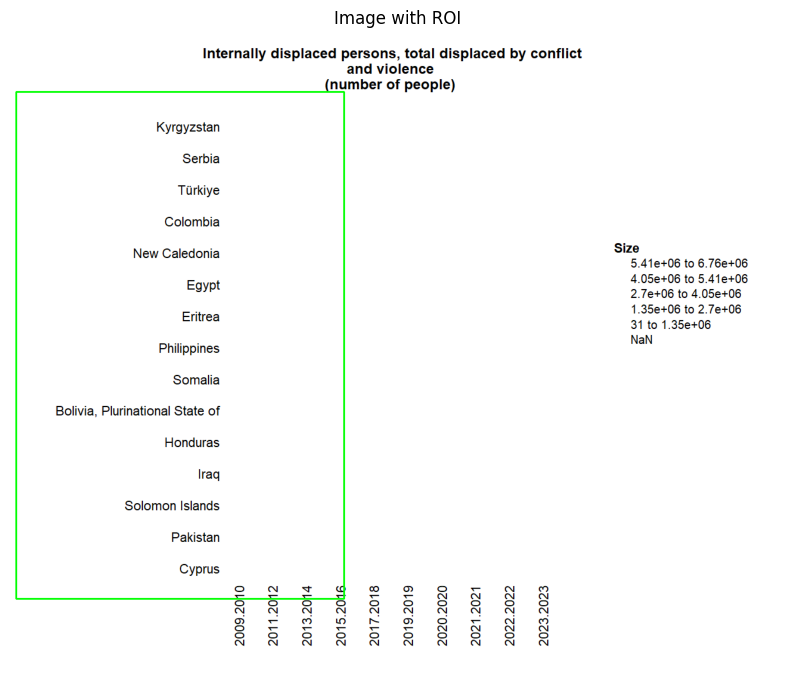

Extracted Text from ROI:
Kyrgyzstan
Serbia

Turkiye
Colombia

New Caledonia
Egypt

Eritrea
Philippines
Somalia

Bolivia, Plurinational State of
Honduras

lraq

Solomon Islands
Pakistan

Cyprus




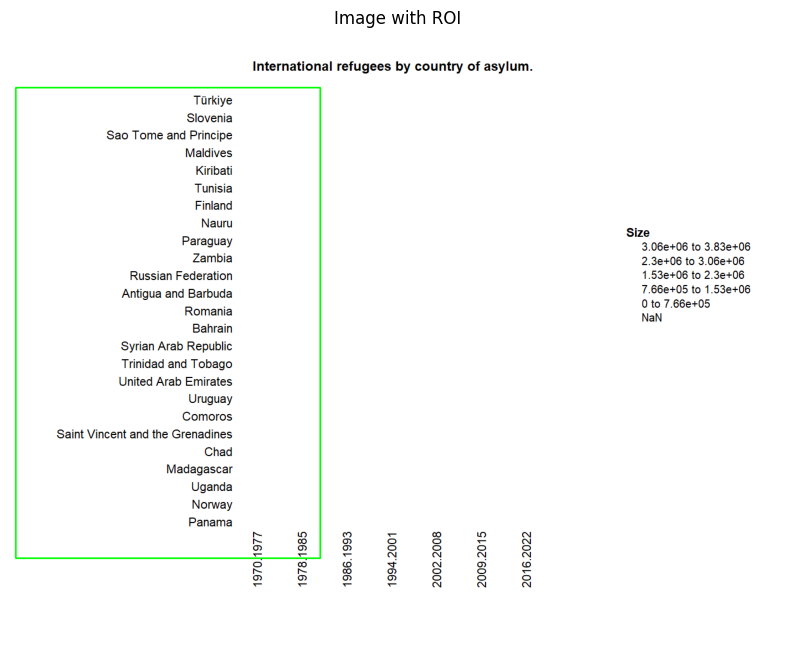

Extracted Text from ROI:
Turkiye

Slovenia

Sao Tome and Principe
Maldives

Kiribati

Tunisia

Finland

Nauru

Paraguay

Zambia

Russian Federation
Antigua and Barbuda
Romania

Bahrain

Syrian Arab Republic
Trinidad and Tobago
United Arab Emirates
Uruguay

Comoros

Saint Vincent and the Grenadines
Chad

Madagascar

Uganda

Norway

Panama

1977

1985




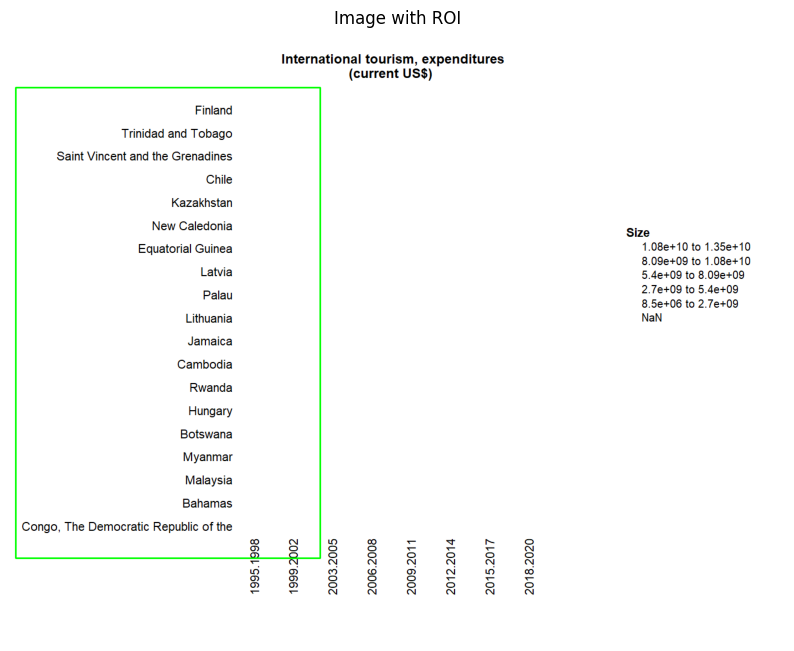

Extracted Text from ROI:
Finland

Trinidad and Tobago
Saint Vincent and the Grenadines
Chile

Kazakhstan

New Caledonia
Equatorial Guinea
Latvia

Palau

Lithuania

Jamaica

Cambodia

Rwanda

Hungary

Botswana

Myanmar

Malaysia

Bahamas

Congo, The Democratic Republic of the

998

002




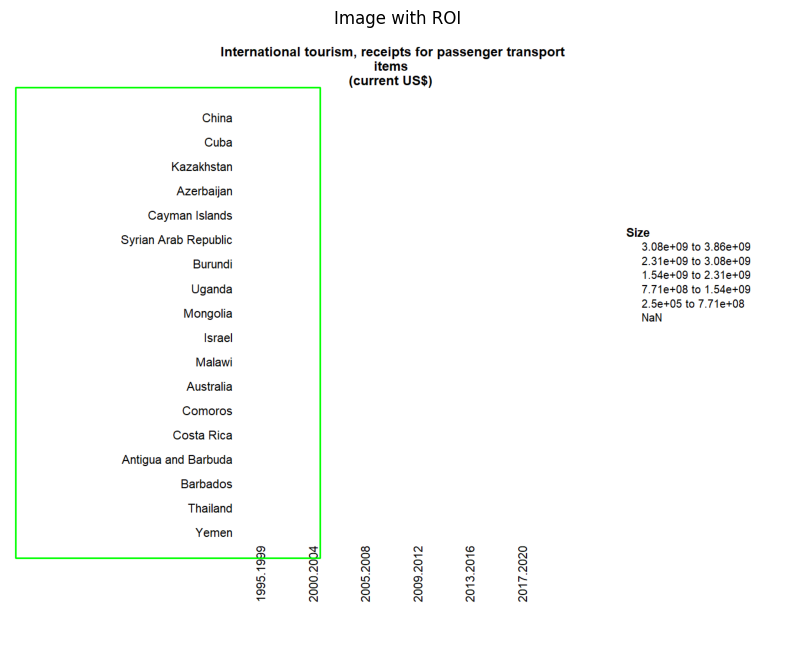

Extracted Text from ROI:
China

Cuba

Kazakhstan
Azerbaijan

Cayman Islands
Syrian Arab Republic
Burundi

Uganda

Mongolia

Israel

Malawi

Australia

Comoros

Costa Rica

Antigua and Barbuda
Barbados

Thailand

Yemen

99

04




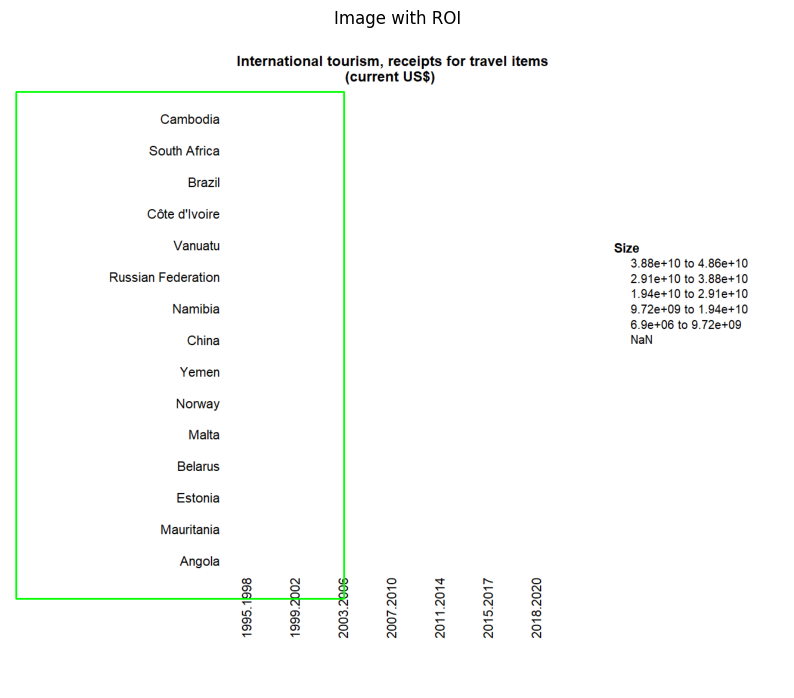

Extracted Text from ROI:
Cambodia
South Africa
Brazil

Céte d'Ivoire
Vanuatu
Russian Federation
Namibia
China
Yemen
Norway
Malta
Belarus
Estonia
Mauritania

Angola

198

102




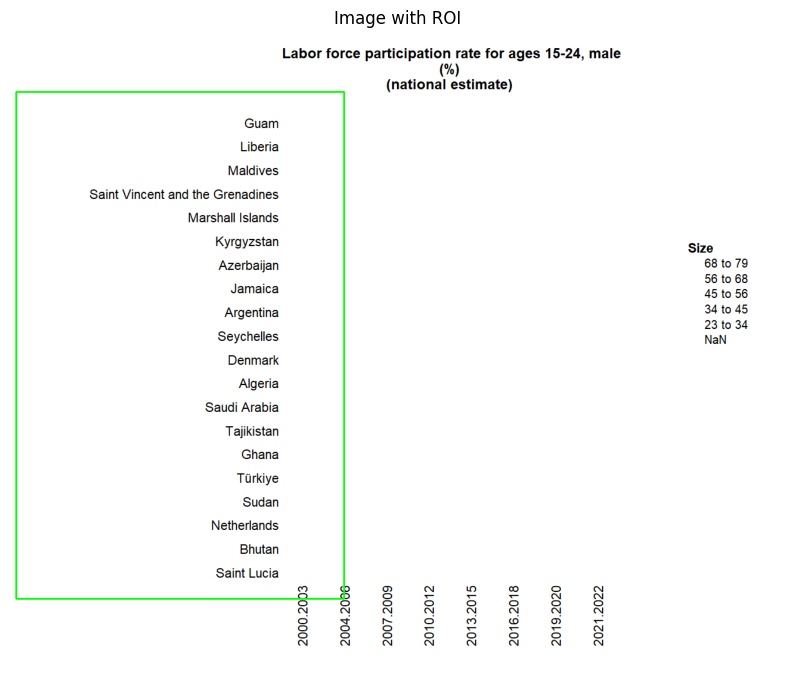

Extracted Text from ROI:
Guam

Liberia
Maldives

Saint Vincent and the Grenadines
Marshall Islands
Kyrgyzstan
Azerbaijan
Jamaica
Argentina
Seychelles
Denmark
Algeria

Saudi Arabia
Tajikistan
Ghana

Turkiye

Sudan
Netherlands
Bhutan

Saint Lucia

03,




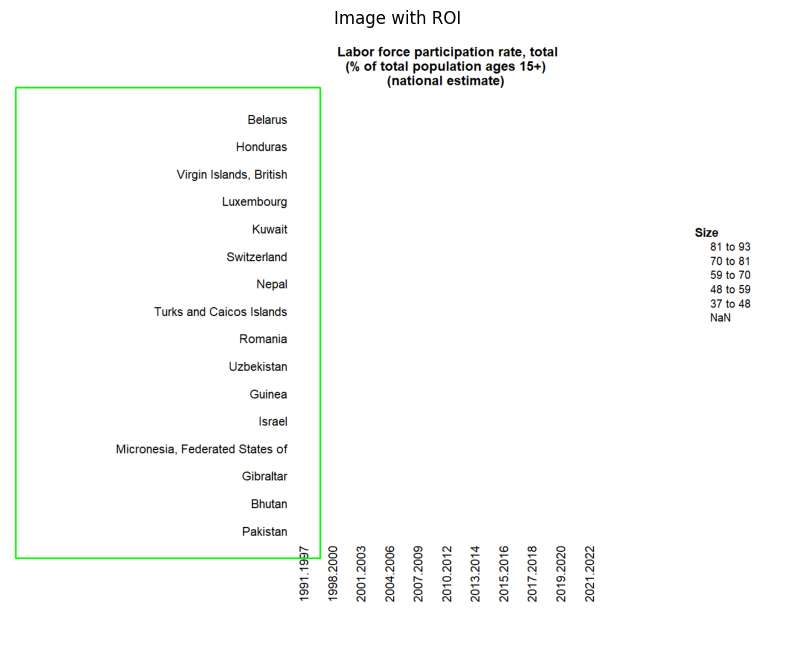

Extracted Text from ROI:
Belarus

Honduras

Virgin Islands, British
Luxembourg

Kuwait

Switzerland

Nepal

Turks and Caicos Islands
Romania

Uzbekistan

Guinea

Israel

Micronesia, Federated States of
Gibraltar

Bhutan

Pakistan

a7




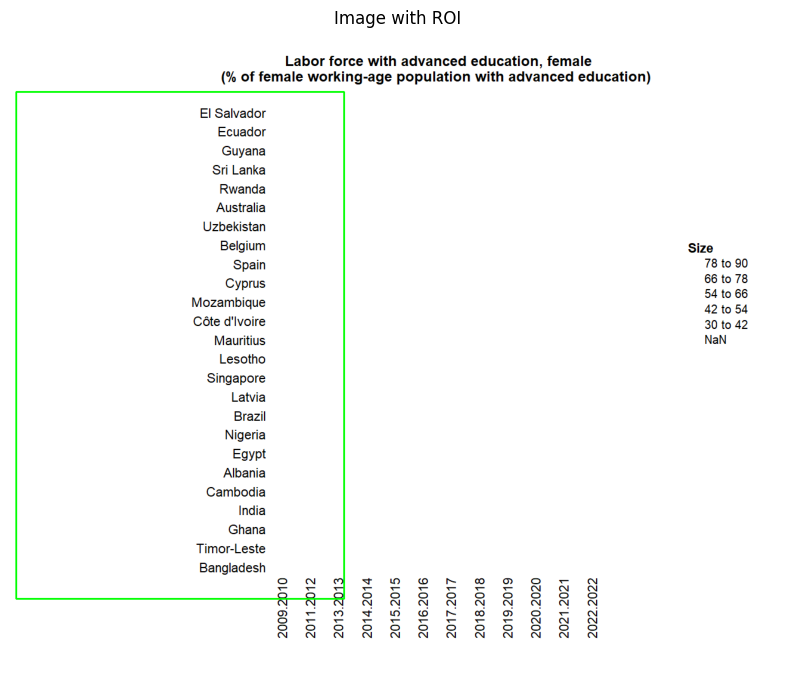

Extracted Text from ROI:
El Salvador
Ecuador
Guyana

Sri Lanka
Rwanda
Australia

Uzbekistan

Belgium

Spain
Cyprus
Mozambique
Céte d'Ivoire
Mauritius
Lesotho
Singapore
Latvia

Brazil
Nigeria
Egypt
Albania
Cambodia
India

Ghana
Timor-Leste
Bangladesh

010
012




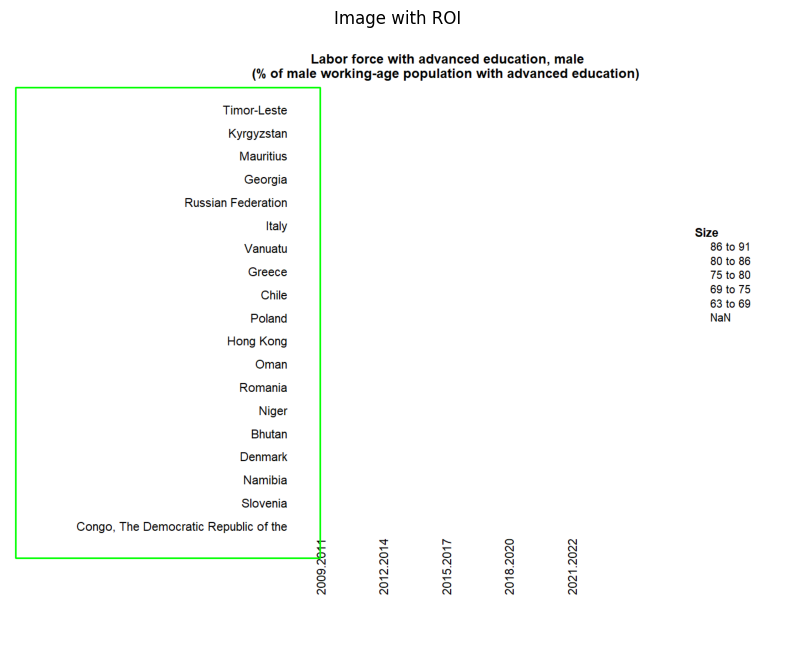

Extracted Text from ROI:
Timor-Leste
Kyrgyzstan
Mauritius
Georgia
Russian Federation
Italy
Vanuatu
Greece
Chile
Poland
Hong Kong
Oman
Romania
Niger
Bhutan
Denmark
Namibia
Slovenia

Congo, The Democratic Republic of the




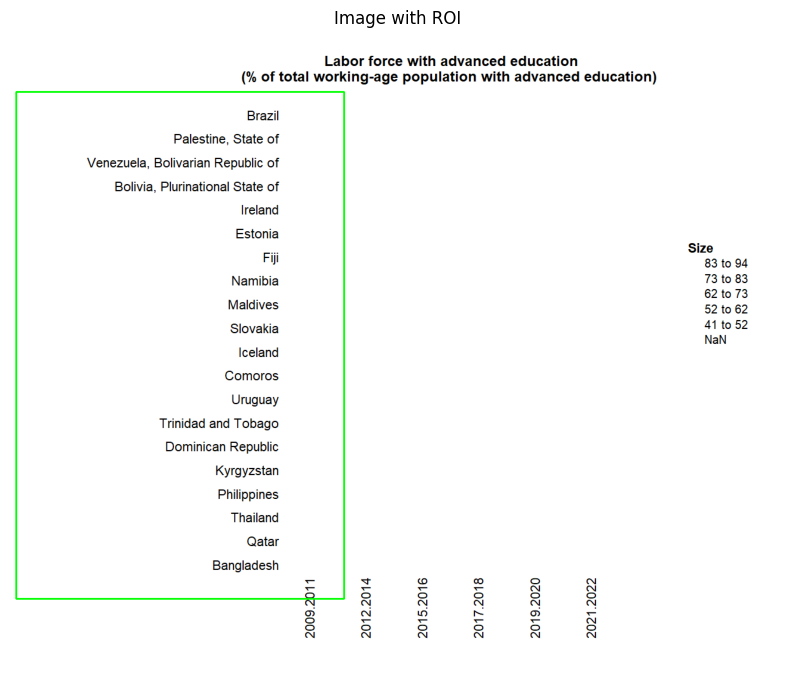

Extracted Text from ROI:
Brazil

Palestine, State of
Venezuela, Bolivarian Republic of
Bolivia, Plurinational State of
Ireland

Estonia

Fiji

Namibia

Maldives

Slovakia

Iceland

Comoros

Uruguay

Trinidad and Tobago
Dominican Republic
Kyrgyzstan

Philippines

Thailand

Qatar

Bangladesh

011




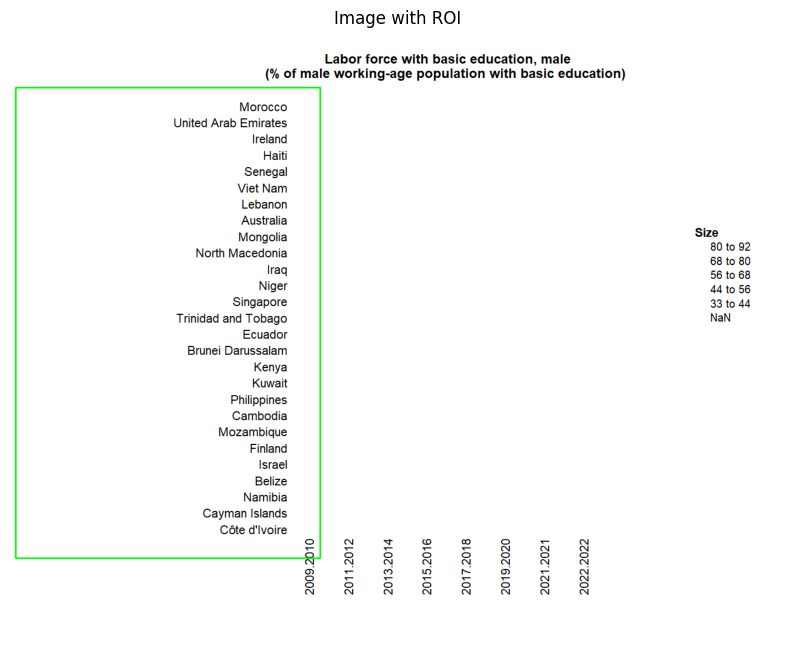

Extracted Text from ROI:
Morocco

United Arab Emirates
Ireland

Haiti

Senegal

Viet Nam
Lebanon

Australia

Mongolia

North Macedonia
lraq

Niger

Singapore
Trinidad and Tobago
Ecuador

Brunei Darussalam
Kenya

Kuwait

Philippines
Cambodia
Mozambique
Finland

Israel

Belize

Namibia

Cayman Islands
Céte d'Ivoire

010




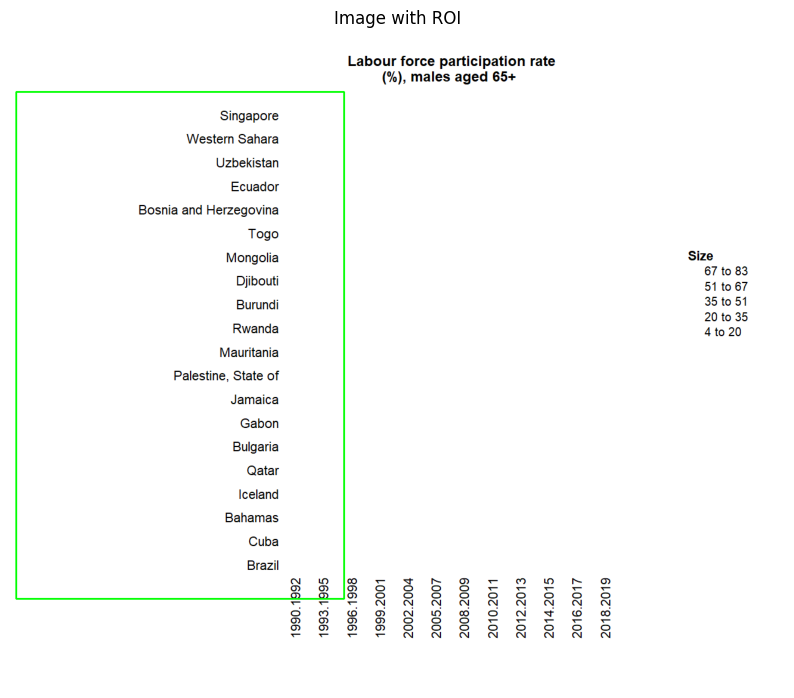

Extracted Text from ROI:
Singapore
Western Sahara
Uzbekistan
Ecuador

Bosnia and Herzegovina
Togo

Mongolia

Djibouti

Burundi

Rwanda
Mauritania
Palestine, State of
Jamaica

Gabon

Bulgaria

Qatar

Iceland

Bahamas

Cuba

Brazil

92

95



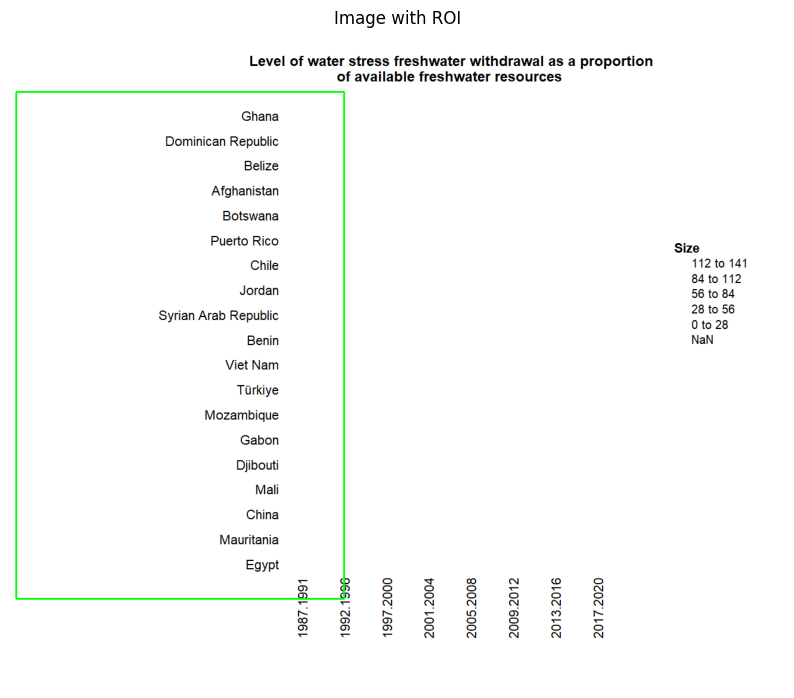

Extracted Text from ROI:
Ghana

Dominican Republic
Belize

Afghanistan
Botswana

Puerto Rico

Chile

Jordan

Syrian Arab Republic
Benin

Viet Nam

Turkiye
Mozambique
Gabon

Djibouti

Mali

China

Mauritania

Egypt

991




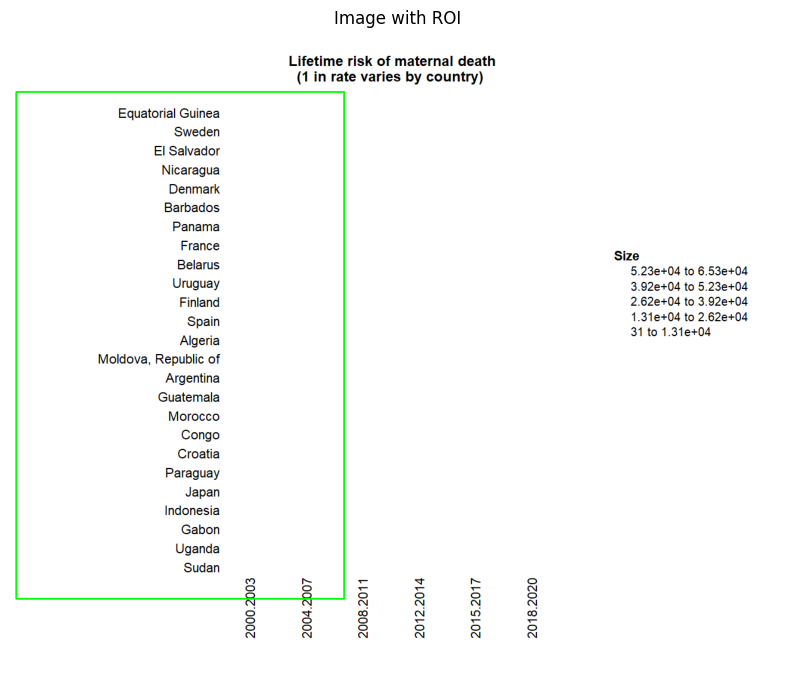

Extracted Text from ROI:
Equatorial Guinea
Sweden

El Salvador
Nicaragua
Denmark
Barbados
Panama
France
Belarus
Uruguay
Finland
Spain
Algeria
Moldova, Republic of
Argentina
Guatemala
Morocco
Congo
Croatia
Paraguay
Japan
Indonesia
Gabon
Uganda
Sudan

003

007




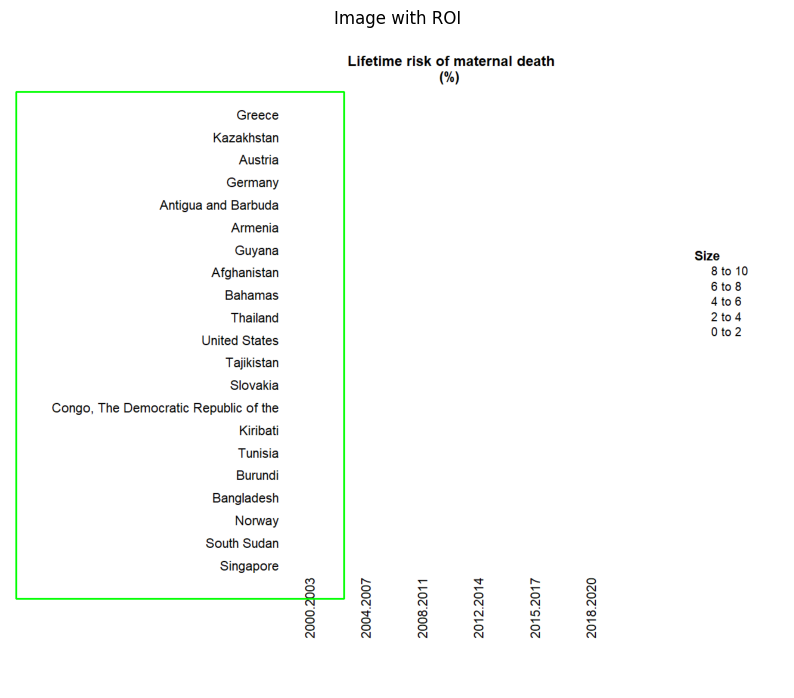

Extracted Text from ROI:
Greece

Kazakhstan

Austria

Germany

Antigua and Barbuda
Armenia

Guyana

Afghanistan
Bahamas

Thailand

United States
Tajikistan

Slovakia

Congo, The Democratic Republic of the
Kiribati

Tunisia

Burundi

Bangladesh

Norway

South Sudan

Singapore

003




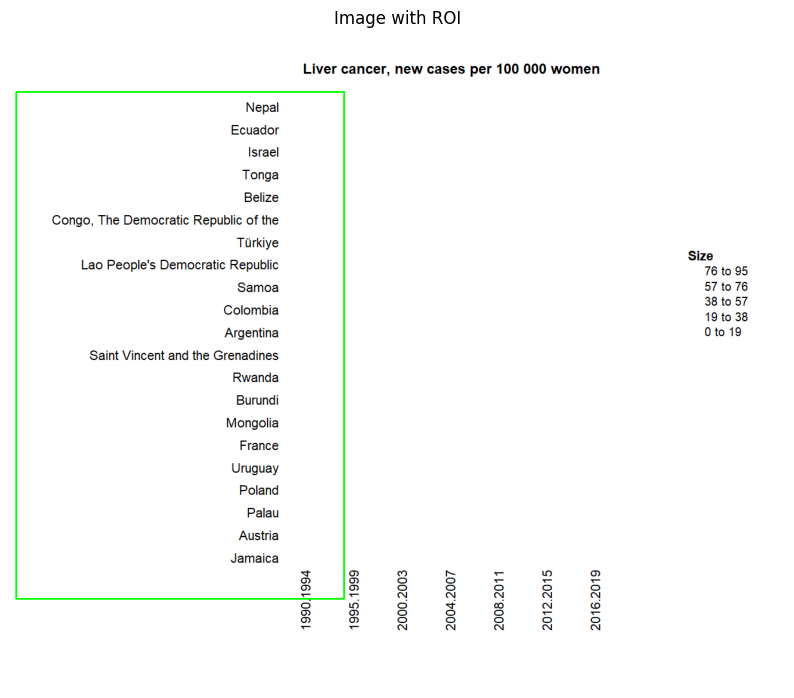

Extracted Text from ROI:
Nepal

Ecuador

Israel

Tonga

Belize

Congo, The Democratic Republic of the
Turkiye

Lao People's Democratic Republic
Samoa

Colombia

Argentina

Saint Vincent and the Grenadines
Rwanda

Burundi

Mongolia

France

Uruguay

Poland

Palau

Austria

Jamaica

1994




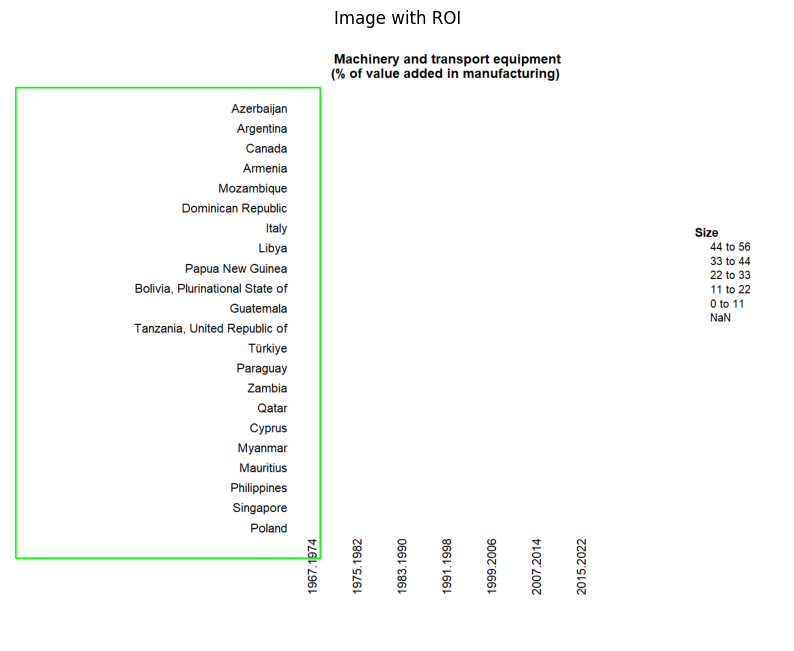

Extracted Text from ROI:
Azerbaijan
Argentina

Canada

Armenia
Mozambique
Dominican Republic
Italy

Libya

Papua New Guinea
Bolivia, Plurinational State of
Guatemala
Tanzania, United Republic of
Turkiye

Paraguay

Zambia

Qatar

Cyprus

Myanmar

Mauritius
Philippines
Singapore

Poland

974




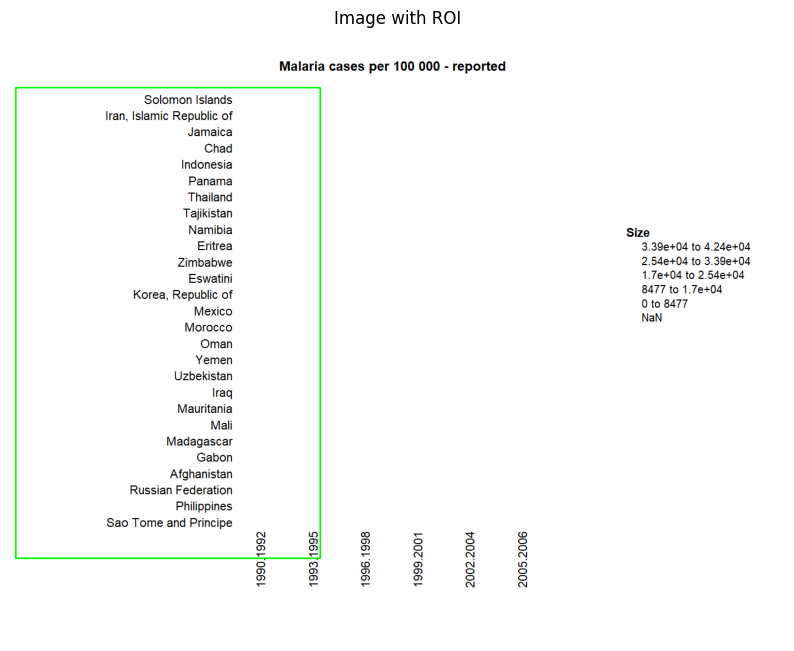

Extracted Text from ROI:
Solomon Islands
Iran, Islamic Republic of
Jamaica

Chad

Indonesia

Panama

Thailand

Tajikistan

Namibia

Eritrea

Zimbabwe
Eswatini

Korea, Republic of
Mexico

Morocco

Oman

Yemen

Uzbekistan

lraq

Mauritania

Mali

Madagascar
Gabon
Afghanistan
Russian Federation
Philippines

Sao Tome and Principe

1992

1995




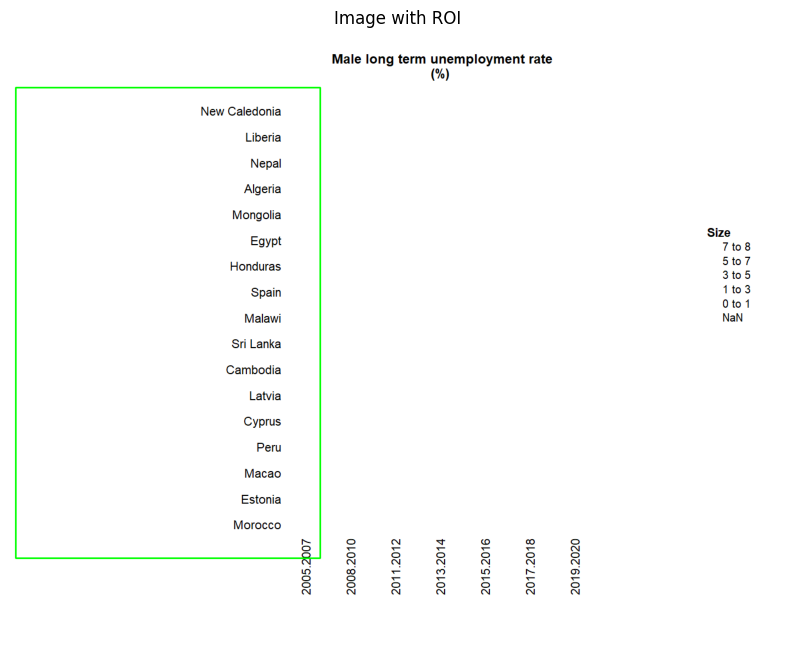

Extracted Text from ROI:
New Caledonia
Liberia
Nepal
Algeria
Mongolia
Egypt
Honduras
Spain
Malawi

Sri Lanka
Cambodia
Latvia
Cyprus
Peru
Macao
Estonia

Morocco

007




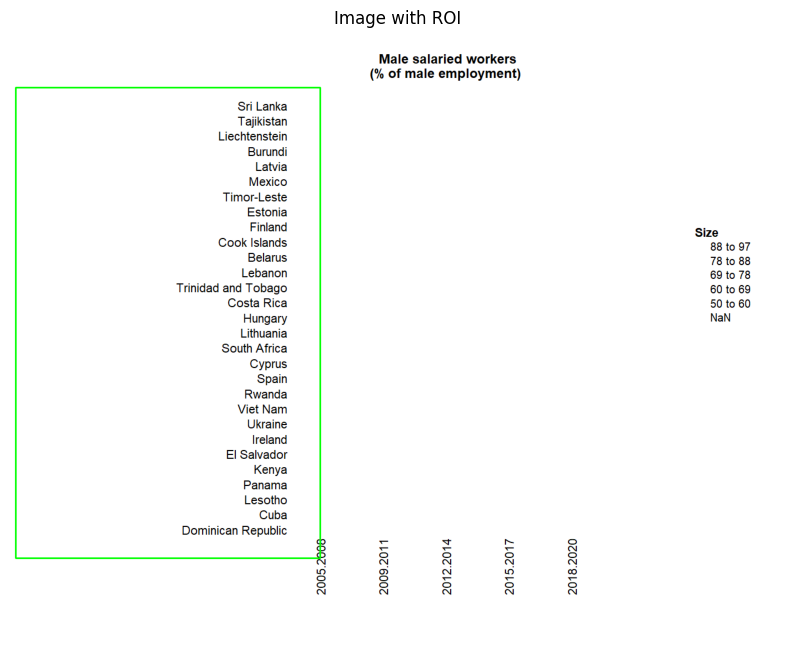

Extracted Text from ROI:
Sri Lanka
Tajikistan
Liechtenstein
Burundi
Latvia
Mexico
Timor-Leste
Estonia
Finland
Cook Islands
Belarus
Lebanon
Trinidad and Tobago
Costa Rica
Hungary
Lithuania
South Africa
Cyprus
Spain
Rwanda

Viet Nam
Ukraine
Ireland

El Salvador
Kenya
Panama
Lesotho
Cuba
Dominican Republic




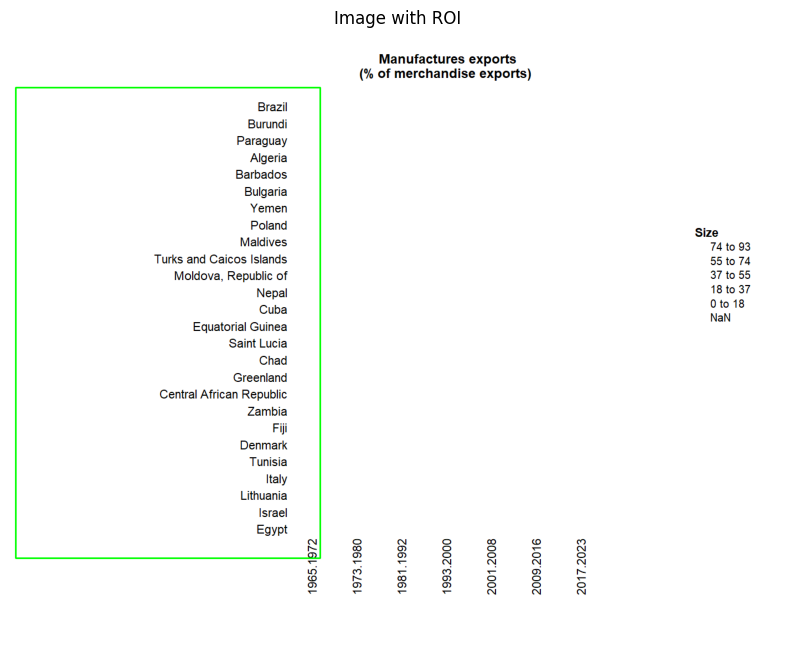

Extracted Text from ROI:
Brazil

Burundi

Paraguay

Algeria

Barbados

Bulgaria

Yemen

Poland

Maldives

Turks and Caicos Islands
Moldova, Republic of
Nepal

Cuba

Equatorial Guinea
Saint Lucia

Chad

Greenland

Central African Republic
Zambia

Fiji

Denmark

Tunisia

Italy

Lithuania

Israel

Egypt

972




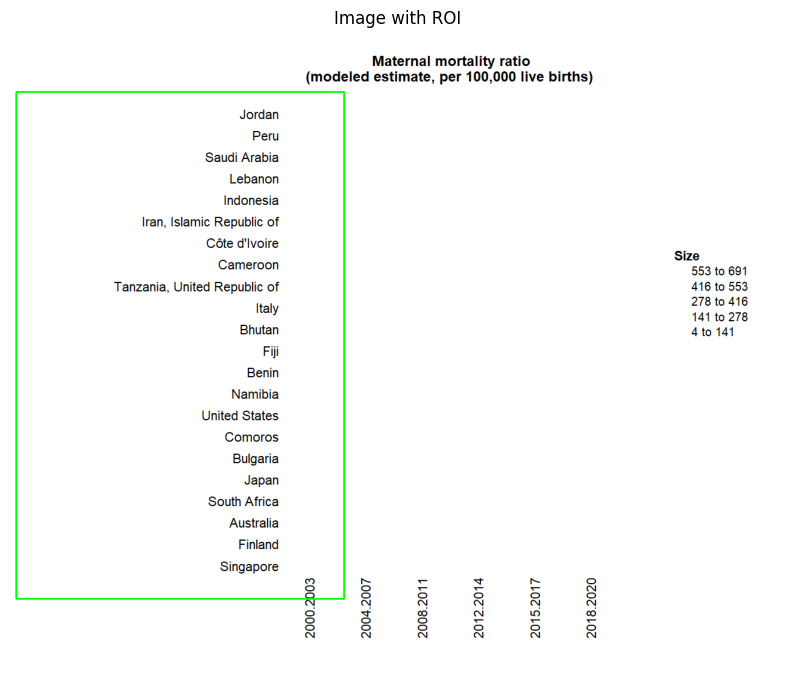

Extracted Text from ROI:
Jordan

Peru

Saudi Arabia
Lebanon
Indonesia
Iran, Islamic Republic of
Céte d'Ivoire
Cameroon
Tanzania, United Republic of
Italy

Bhutan

Fiji

Benin
Namibia
United States
Comoros
Bulgaria
Japan

South Africa
Australia
Finland
Singapore

003




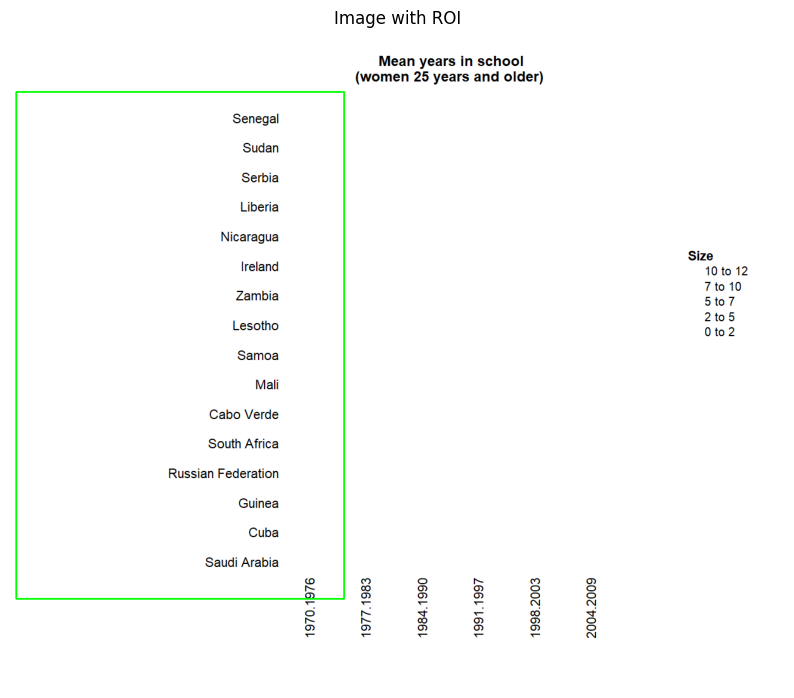

Extracted Text from ROI:
Senegal
Sudan
Serbia
Liberia

Nicaragua
Ireland
Zambia
Lesotho
Samoa

Mali

Cabo Verde
South Africa
Russian Federation
Guinea
Cuba

Saudi Arabia

;




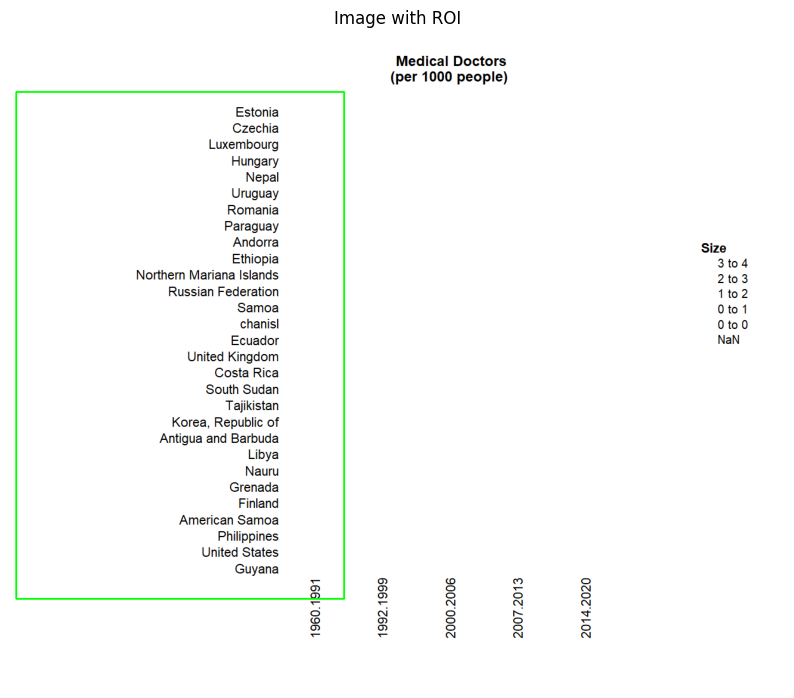

Extracted Text from ROI:
Estonia

Czechia
Luxembourg
Hungary

Nepal

Uruguay

Romania
Paraguay

Andorra

Ethiopia

Northern Mariana Islands
Russian Federation
Samoa

chanis!

Ecuador

United Kingdom
Costa Rica

South Sudan
Tajikistan

Korea, Republic of
Antigua and Barbuda
Libya

Nauru

Grenada

Finland

American Samoa
Philippines

United States
Guyana

991




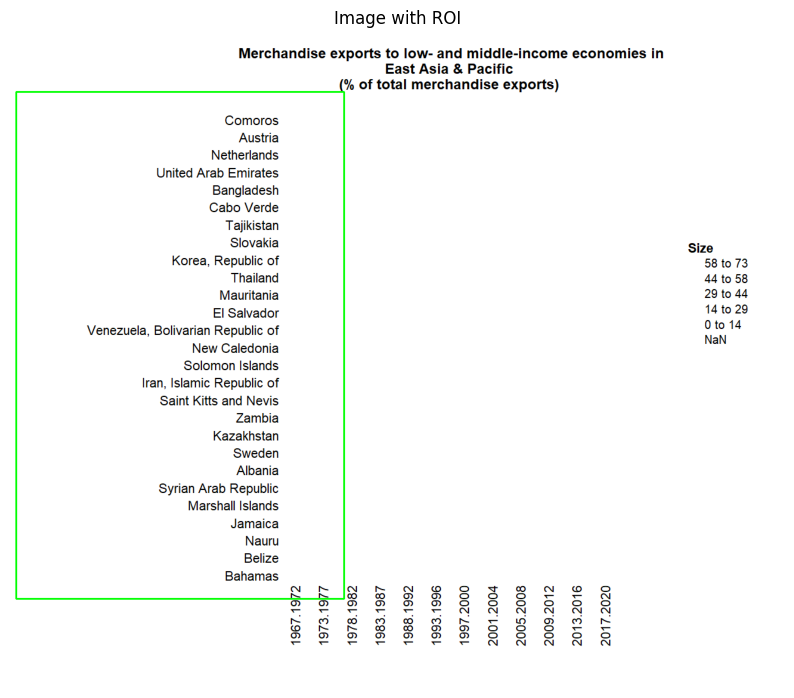

Extracted Text from ROI:
Comoros

Austria

Netherlands

United Arab Emirates
Bangladesh

Cabo Verde
Tajikistan

Slovakia

Korea, Republic of
Thailand

Mauritania

El Salvador
Venezuela, Bolivarian Republic of
New Caledonia
Solomon Islands
Iran, Islamic Republic of
Saint Kitts and Nevis
Zambia

Kazakhstan

Sweden

Albania

Syrian Arab Republic
Marshall Islands
Jamaica

Nauru

Belize

Bahamas

72

77



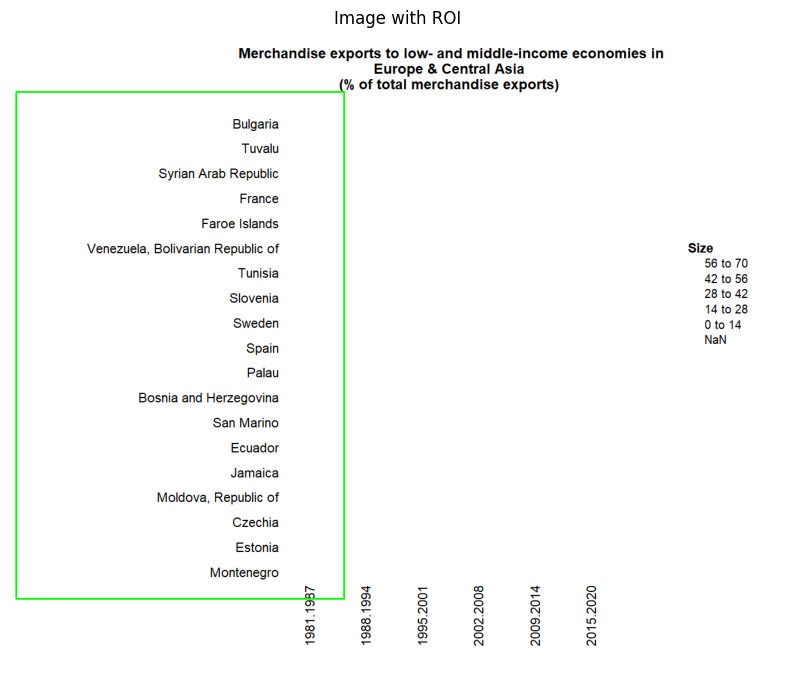

Extracted Text from ROI:
Bulgaria

Tuvalu

Syrian Arab Republic
France

Faroe Islands
Venezuela, Bolivarian Republic of
Tunisia

Slovenia

Sweden

Spain

Palau

Bosnia and Herzegovina
San Marino

Ecuador

Jamaica

Moldova, Republic of
Czechia

Estonia

Montenegro

87




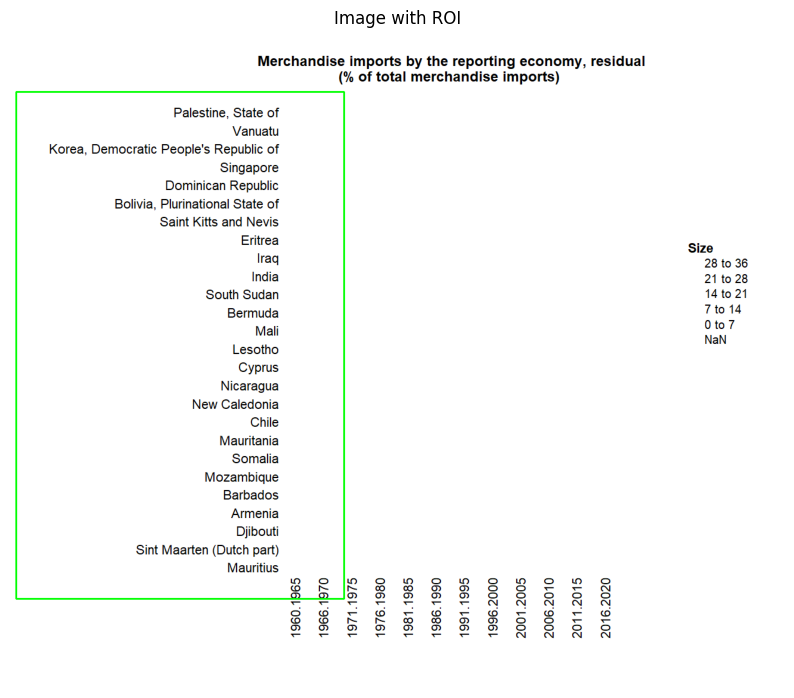

Extracted Text from ROI:
Palestine, State of
Vanuatu

Korea, Democratic People's Republic of
Singapore

Dominican Republic
Bolivia, Plurinational State of
Saint Kitts and Nevis
Eritrea

lraq

India

South Sudan

Bermuda

Mali

Lesotho

Cyprus

Nicaragua

New Caledonia

Chile

Mauritania

Somalia

Mozambique

Barbados

Armenia

Djibouti

Sint Maarten (Dutch part)
Mauritius

965
970




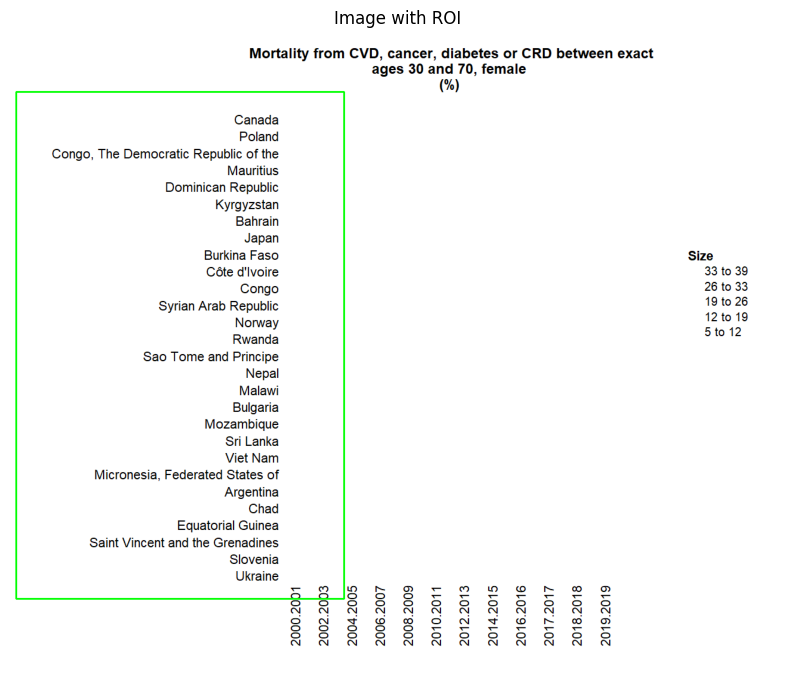

Extracted Text from ROI:
Canada

Poland

Congo, The Democratic Republic of the
Mauritius

Dominican Republic

Kyrgyzstan

Bahrain

Japan

Burkina Faso

Céte d'Ivoire

Congo

Syrian Arab Republic

Norway

Rwanda

Sao Tome and Principe

Nepal

Malawi

Bulgaria

Mozambique

Sri Lanka

Viet Nam

Micronesia, Federated States of
Argentina

Chad

Equatorial Guinea

Saint Vincent and the Grenadines
Slovenia

Ukraine

01

03,



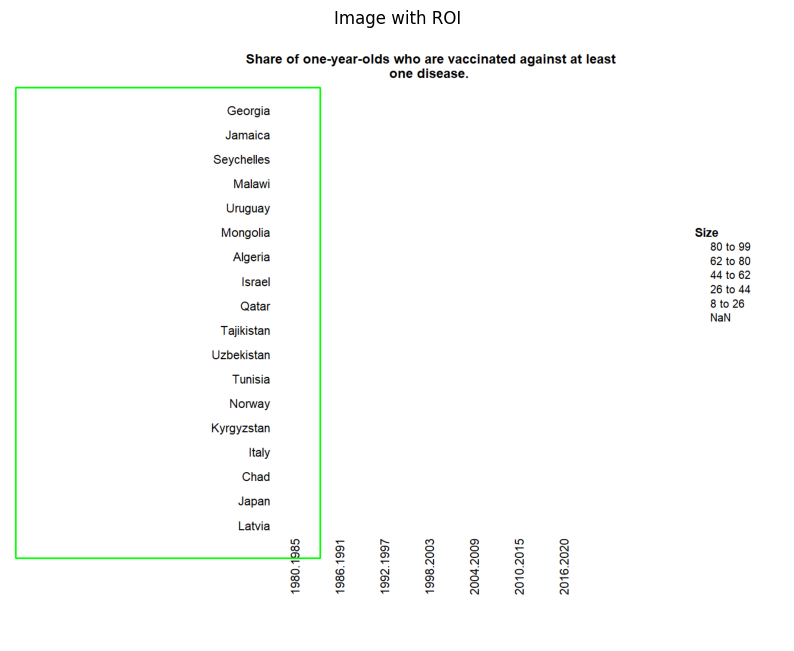

Extracted Text from ROI:
Georgia
Jamaica
Seychelles
Malawi
Uruguay
Mongolia
Algeria
Israel
Qatar
Tajikistan
Uzbekistan
Tunisia
Norway
Kyrgyzstan
Italy

Chad
Japan

Latvia

nee




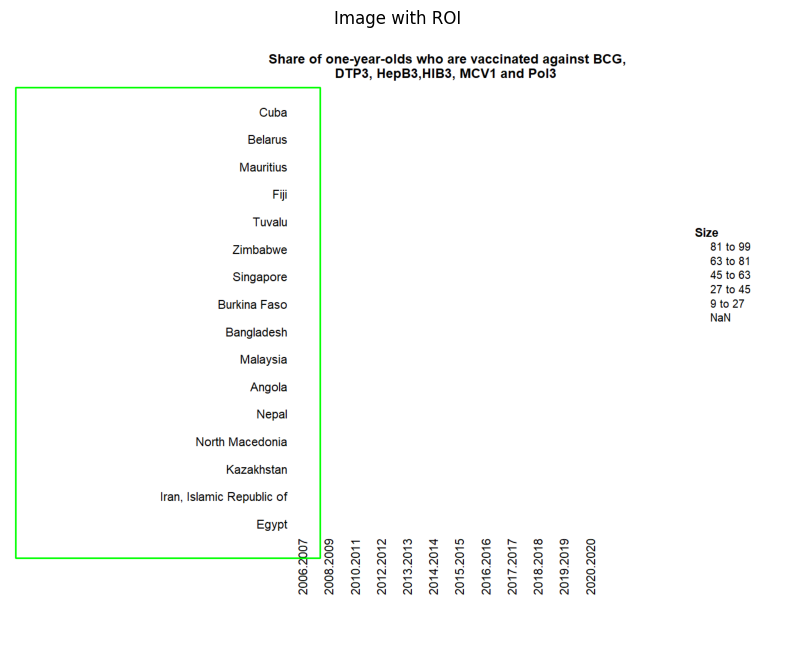

Extracted Text from ROI:
Cuba

Belarus

Mauritius

Fiji

Tuvalu
Zimbabwe
Singapore
Burkina Faso
Bangladesh
Malaysia

Angola

Nepal

North Macedonia
Kazakhstan

Iran, Islamic Republic of

Egypt

007




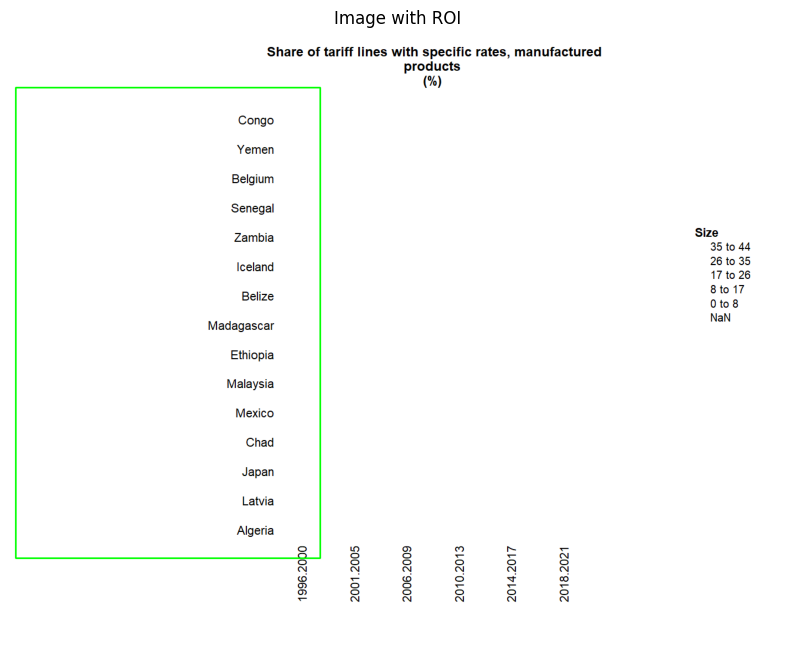

Extracted Text from ROI:
Congo
Yemen
Belgium
Senegal
Zambia
Iceland
Belize
Madagascar
Ethiopia
Malaysia
Mexico
Chad
Japan
Latvia

Algeria

00




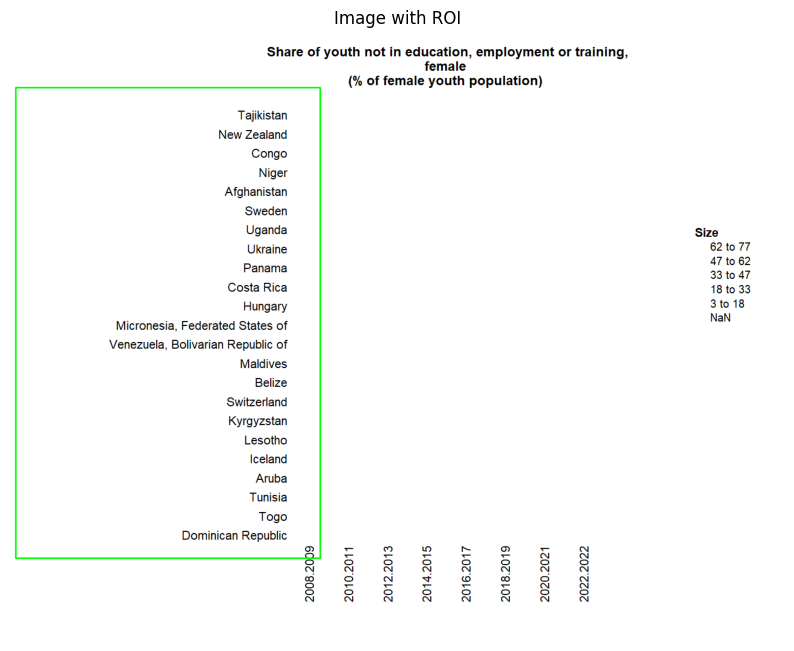

Extracted Text from ROI:
Tajikistan

New Zealand
Congo

Niger

Afghanistan
Sweden

Uganda

Ukraine

Panama

Costa Rica
Hungary
Micronesia, Federated States of
Venezuela, Bolivarian Republic of
Maldives

Belize

Switzerland
Kyrgyzstan
Lesotho

Iceland

Aruba

Tunisia

Togo

Dominican Republic

09




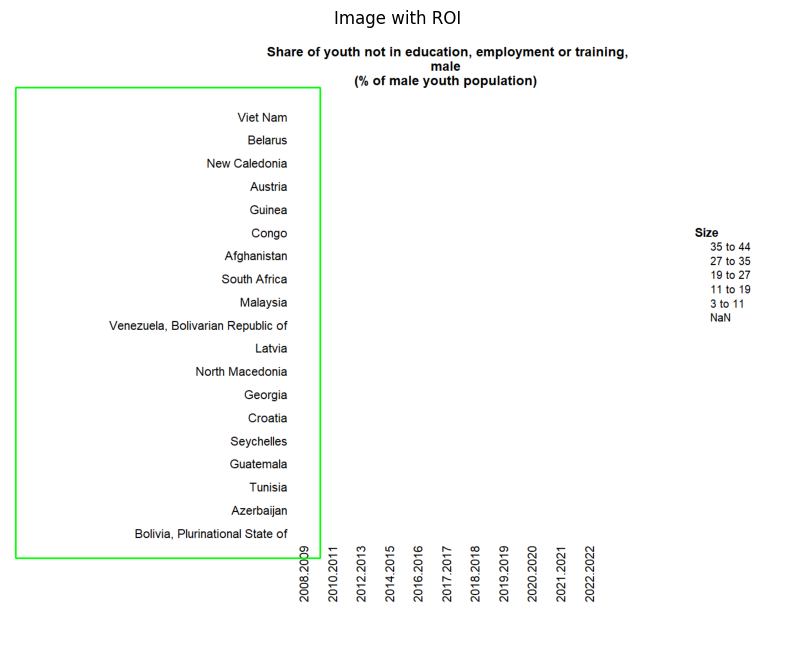

Extracted Text from ROI:
Viet Nam
Belarus

New Caledonia
Austria

Guinea

Congo
Afghanistan
South Africa
Malaysia
Venezuela, Bolivarian Republic of
Latvia

North Macedonia
Georgia

Croatia
Seychelles
Guatemala
Tunisia
Azerbaijan

Bolivia, Plurinational State of

09




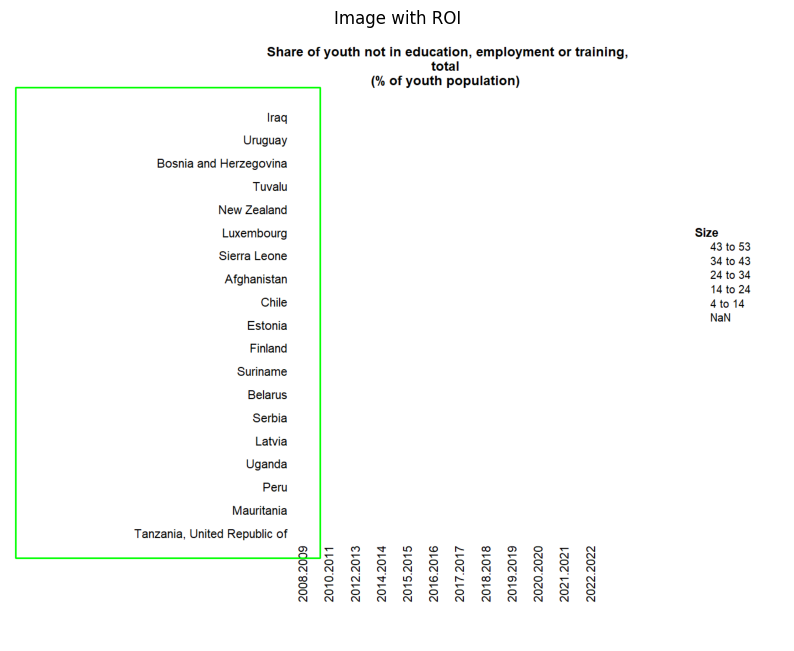

Extracted Text from ROI:
lraq

Uruguay
Bosnia and Herzegovina
Tuvalu

New Zealand
Luxembourg
Sierra Leone
Afghanistan
Chile
Estonia
Finland
Suriname
Belarus
Serbia
Latvia
Uganda
Peru
Mauritania

Tanzania, United Republic of

09




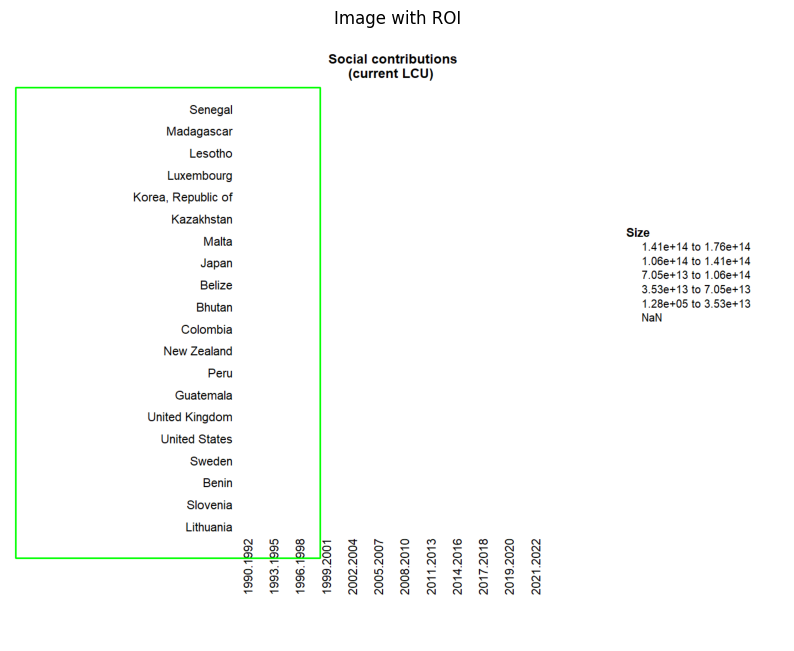

Extracted Text from ROI:
Senegal
Madagascar
Lesotho
Luxembourg
Korea, Republic of
Kazakhstan
Malta

Japan

Belize

Bhutan
Colombia

New Zealand
Peru
Guatemala
United Kingdom
United States
Sweden

Benin

Slovenia

Lithuania

92

5
8




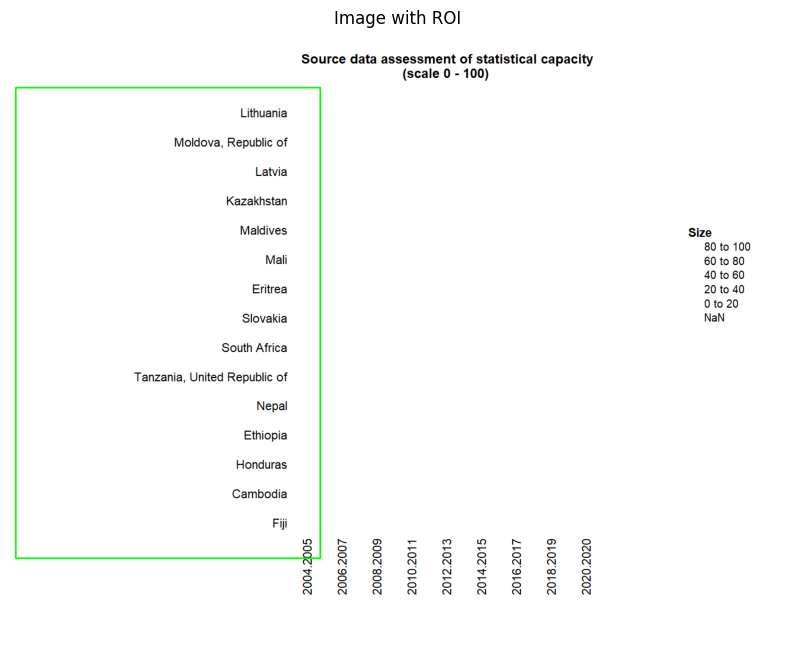

Extracted Text from ROI:
Lithuania

Moldova, Republic of
Latvia

Kazakhstan

Maldives

Mali

Eritrea

Slovakia

South Africa
Tanzania, United Republic of
Nepal

Ethiopia

Honduras

Cambodia

Fiji

005




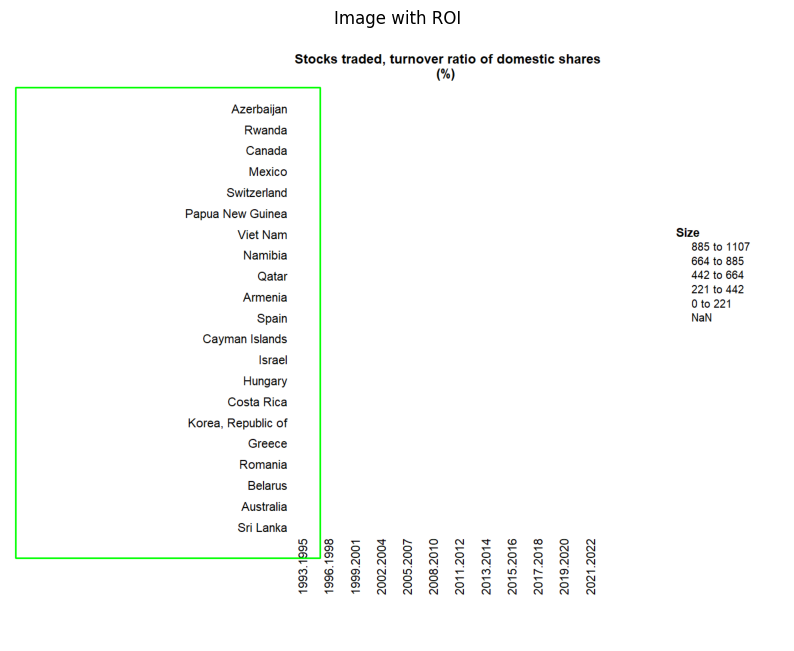

Extracted Text from ROI:
Azerbaijan
Rwanda
Canada

Mexico
Switzerland

Papua New Guinea
Viet Nam

Namibia

Qatar

Armenia

Spain

Cayman Islands
Israel

Hungary

Costa Rica

Korea, Republic of
Greece

Romania

Belarus

Australia

Sri Lanka

995




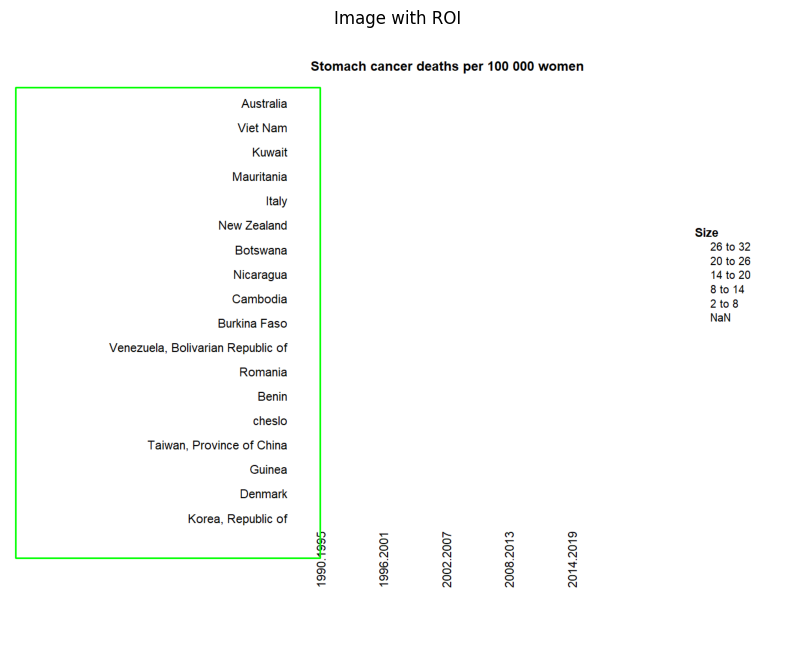

Extracted Text from ROI:
Australia

Viet Nam

Kuwait

Mauritania

Italy

New Zealand

Botswana

Nicaragua

Cambodia

Burkina Faso

Venezuela, Bolivarian Republic of
Romania

Benin

cheslo

Taiwan, Province of China
Guinea

Denmark

Korea, Republic of




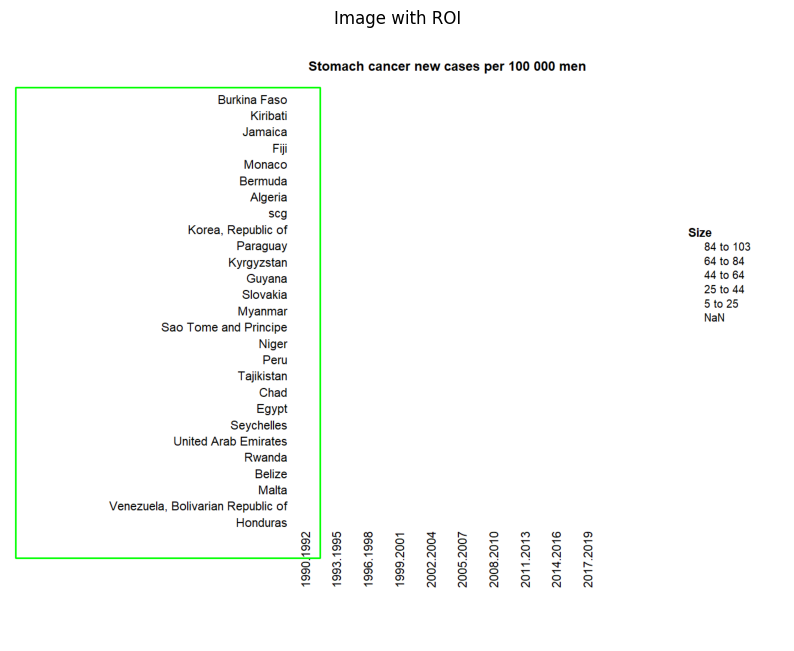

Extracted Text from ROI:
Burkina Faso

Kiribati

Jamaica

Fiji

Monaco

Bermuda

Algeria

seg

Korea, Republic of
Paraguay

Kyrgyzstan

Guyana

Slovakia

Myanmar

Sao Tome and Principe
Niger

Peru

Tajikistan

Chad

Egypt

Seychelles

United Arab Emirates
Rwanda

Belize

Malta

Venezuela, Bolivarian Republic of
Honduras

1992




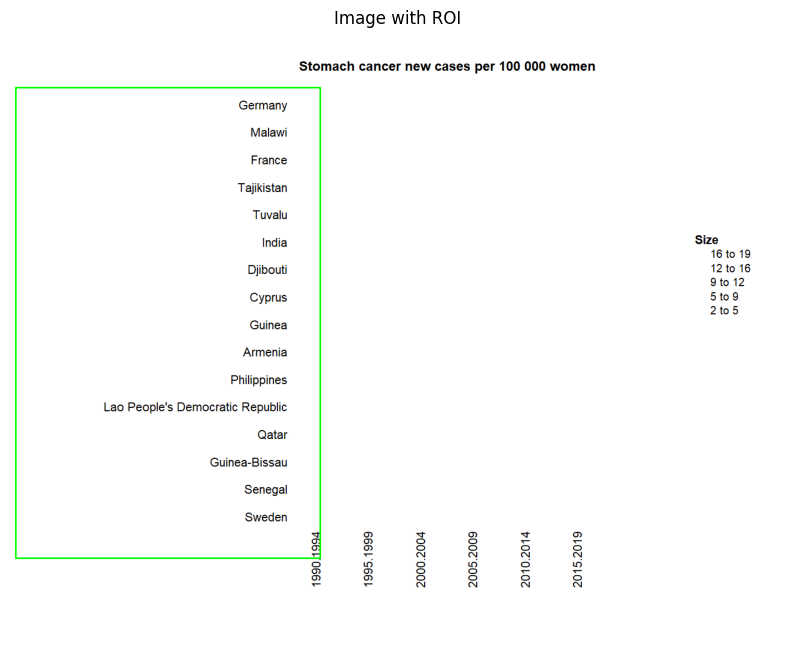

Extracted Text from ROI:
Germany
Malawi

France
Tajikistan
Tuvalu

India

Djibouti
Cyprus
Guinea
Armenia
Philippines
Lao People's Democratic Republic
Qatar
Guinea-Bissau
Senegal

Sweden

1994




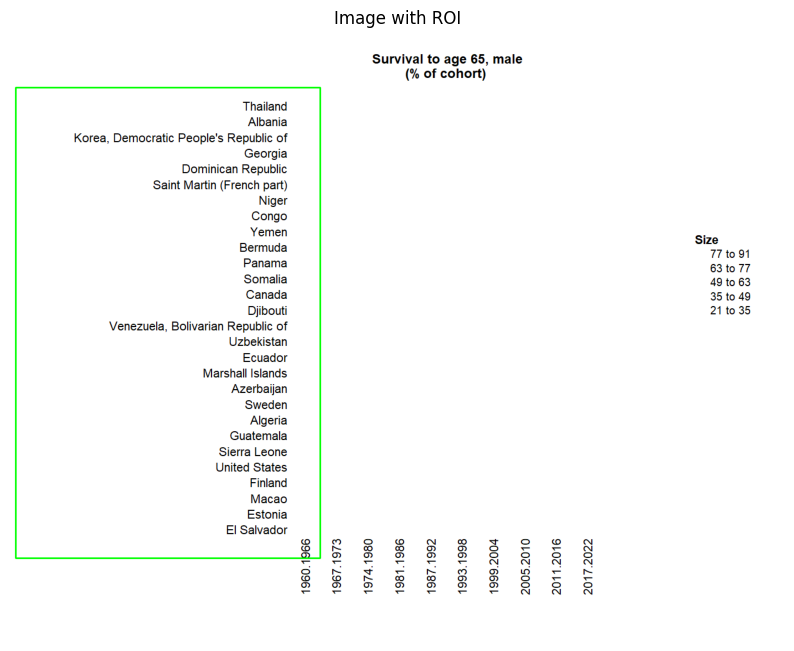

Extracted Text from ROI:
Thailand

Albania

Korea, Democratic People's Republic of
Georgia

Dominican Republic
Saint Martin (French part)
Niger

Congo

Yemen

Bermuda

Panama

Somalia

Canada

Djibouti

Venezuela, Bolivarian Republic of
Uzbekistan

Ecuador

Marshall Islands
Azerbaijan

Sweden

Algeria

Guatemala

Sierra Leone

United States

Finland

Macao

Estonia

El Salvador

966



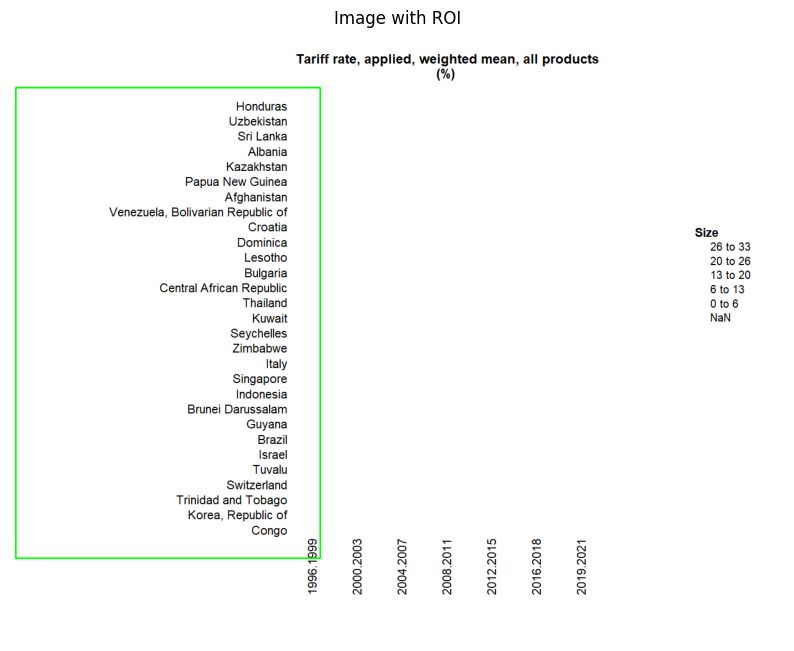

Extracted Text from ROI:
Honduras
Uzbekistan

Sri Lanka

Albania

Kazakhstan

Papua New Guinea
Afghanistan
Venezuela, Bolivarian Republic of
Croatia

Dominica

Lesotho

Bulgaria

Central African Republic
Thailand

Kuwait

Seychelles
Zimbabwe

Italy

Singapore

Indonesia

Brunei Darussalam
Guyana

Brazil

Israel

Tuvalu

Switzerland

Trinidad and Tobago
Korea, Republic of
Congo

999




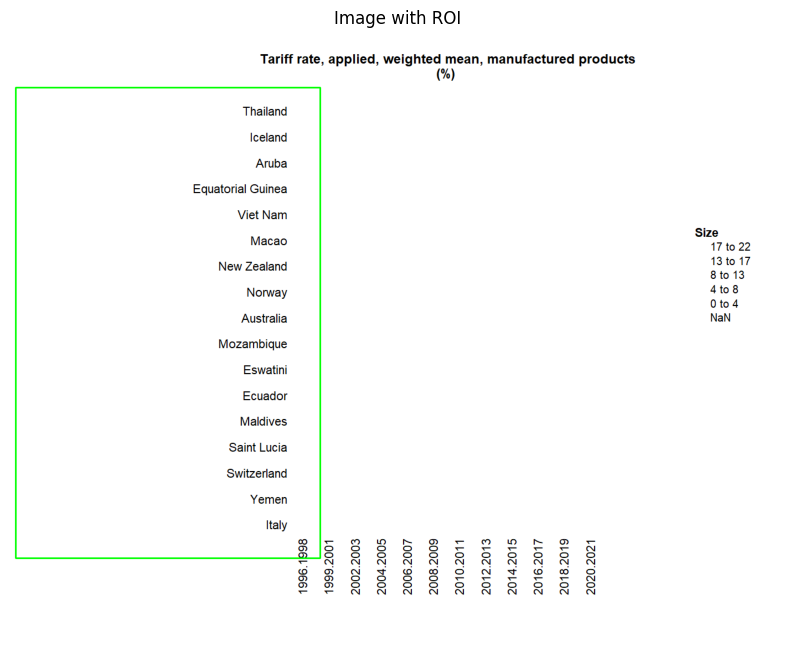

Extracted Text from ROI:
Thailand
Iceland
Aruba
Equatorial Guinea
Viet Nam
Macao

New Zealand
Norway
Australia
Mozambique
Eswatini
Ecuador
Maldives
Saint Lucia
Switzerland
Yemen

Italy

998




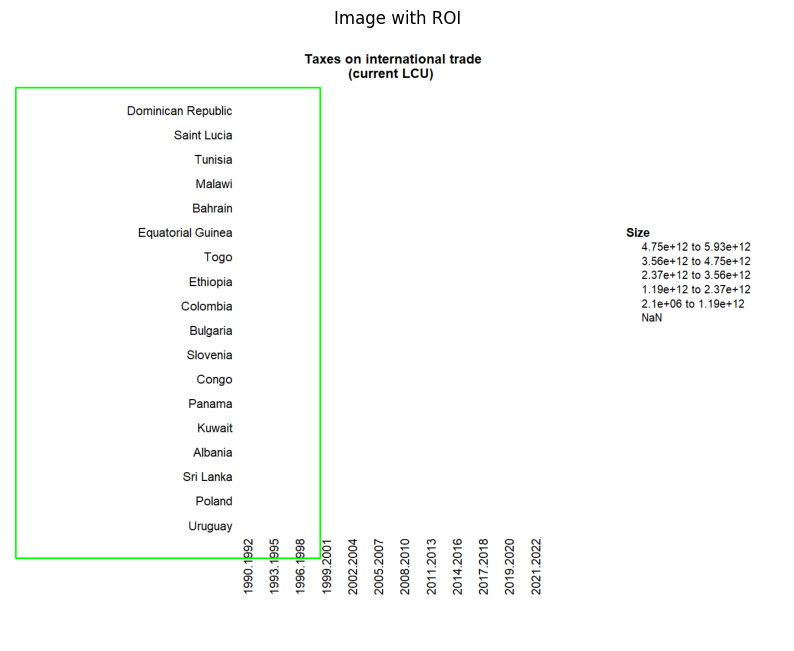

Extracted Text from ROI:
Dominican Republic
Saint Lucia
Tunisia

Malawi

Bahrain
Equatorial Guinea
Togo

Ethiopia
Colombia
Bulgaria

Slovenia

Congo

Panama

Kuwait

Albania

Sri Lanka

Poland

Uruguay

92

5
8




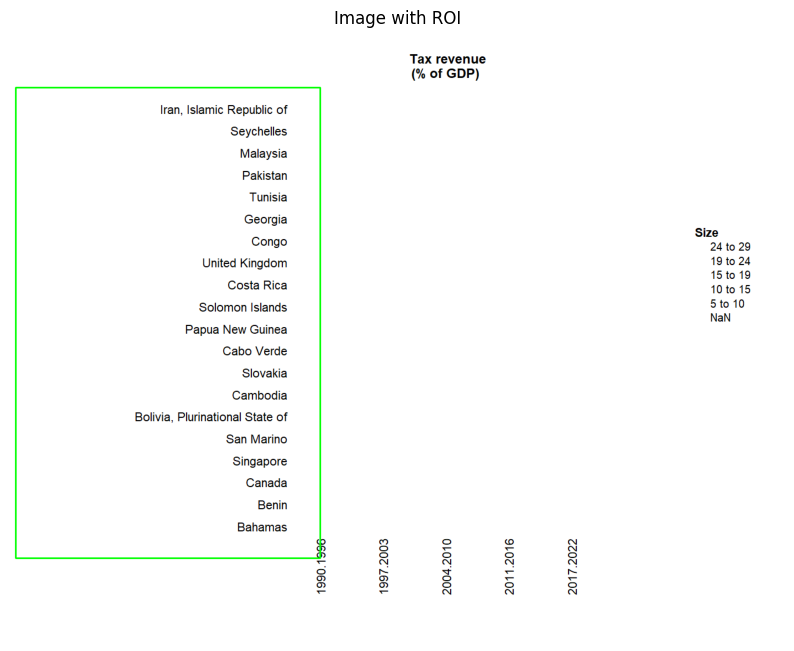

Extracted Text from ROI:
Iran, Islamic Republic of
Seychelles

Malaysia

Pakistan

Tunisia

Georgia

Congo

United Kingdom

Costa Rica

Solomon Islands

Papua New Guinea
Cabo Verde

Slovakia

Cambodia

Bolivia, Plurinational State of
San Marino

Singapore

Canada

Benin

Bahamas




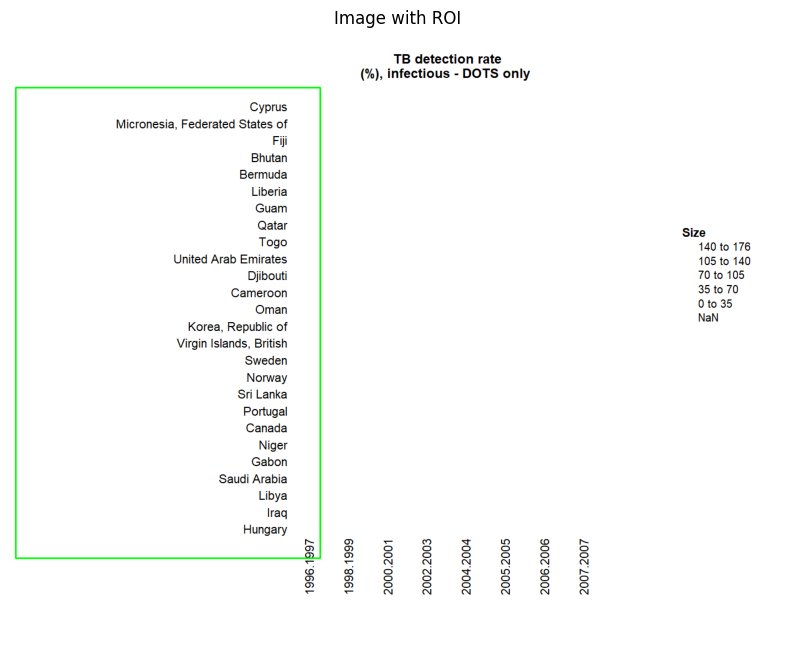

Extracted Text from ROI:
Cyprus

Micronesia, Federated States of
Fiji

Bhutan

Bermuda

Liberia

Guam

Qatar

Togo

United Arab Emirates
Djibouti

Cameroon

Oman

Korea, Republic of
Virgin Islands, British
Sweden

Norway

Sri Lanka

Portugal

Canada

Niger

Gabon

Saudi Arabia

Libya

lraq

Hungary

997




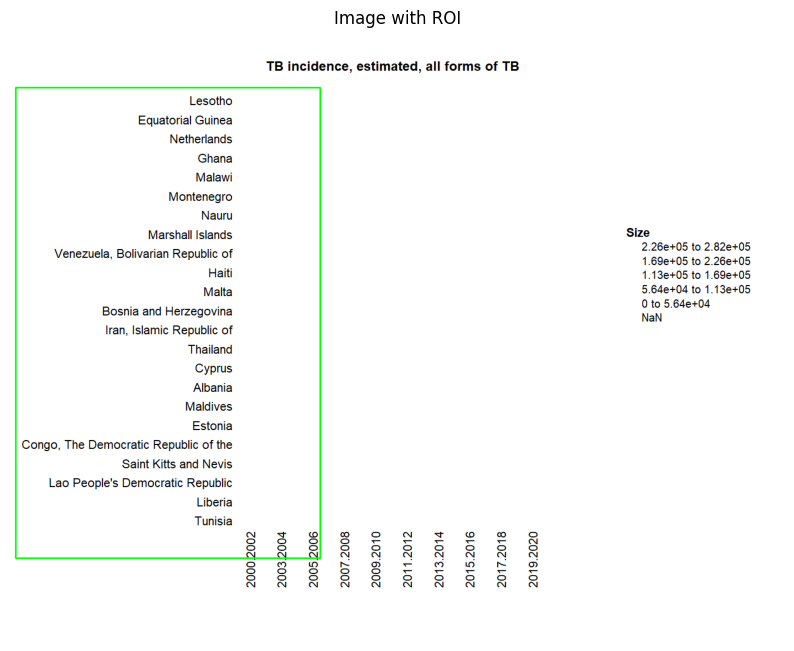

Extracted Text from ROI:
Lesotho

Equatorial Guinea

Netherlands

Ghana

Malawi

Montenegro

Nauru

Marshall Islands

Venezuela, Bolivarian Republic of
Haiti

Malta

Bosnia and Herzegovina

Iran, Islamic Republic of

Thailand

Cyprus

Albania

Maldives

Estonia

Congo, The Democratic Republic of the
Saint Kitts and Nevis

Lao People's Democratic Republic
Liberia

Tunisia

2002

2004

2006



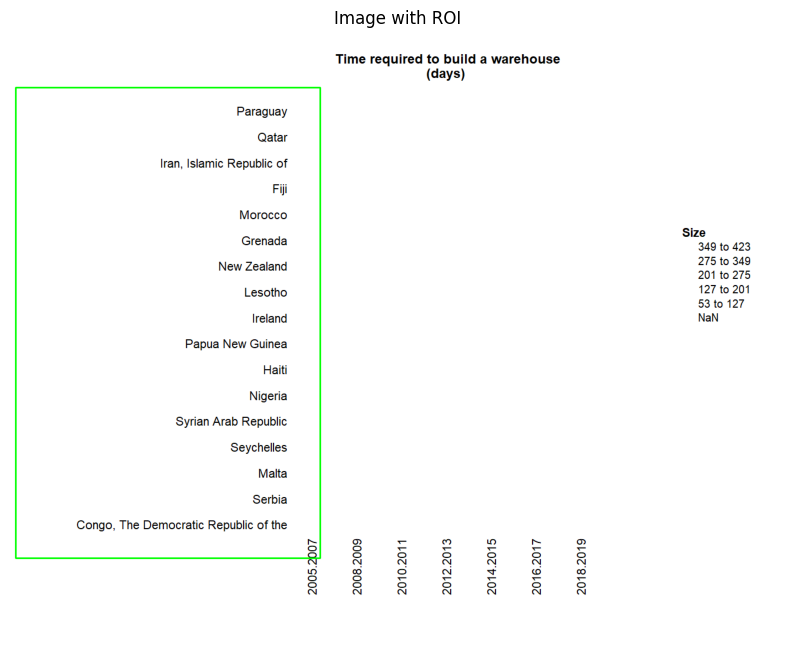

Extracted Text from ROI:
Paraguay

Qatar

Iran, Islamic Republic of
Fiji

Morocco

Grenada

New Zealand
Lesotho

Ireland

Papua New Guinea
Haiti

Nigeria

Syrian Arab Republic
Seychelles

Malta

Serbia

Congo, The Democratic Republic of the

007




In [13]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (10, 100, 550, 850)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the cropped region
        text = pytesseract.image_to_string(gray_cropped)

        print("Extracted Text from ROI:")
        print(text)

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\thesis-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (1000, 200, 250, 400)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Preprocessing steps
        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Apply simple thresholding
        _, thresh_image = cv2.threshold(gray_cropped, 150, 255, cv2.THRESH_BINARY_INV)

        # Resize the image to improve OCR accuracy
        resized_image = cv2.resize(thresh_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        # Display the preprocessed image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(resized_image, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Use Tesseract to extract text from the preprocessed image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(resized_image)

        print("Extracted Text from ROI:")
        print(text)

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\thesis-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (280, 900, 880, 100)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Rotate the cropped image 90 degrees clockwise
        rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)

        # Display the cropped image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Convert the rotated image to grayscale
        gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the rotated region
        text = pytesseract.image_to_string(gray_rotated)

        print("Extracted Text from Rotated ROI:")
        print(text)